# House Price Prediction Project

### Problem Statement:
Houses are one of the necessary need of each and every person around the globe and therefore housing and real estate market is one of the markets which is one of the major contributors in the world’s economy. It is a very large market and there are various companies working in the domain. Data science comes as a very important tool to solve problems in the domain to help the companies increase their overall revenue, profits, improving their marketing strategies and focusing on changing trends in house sales and purchases. Predictive modelling, Market mix modelling, recommendation systems are some of the machine learning techniques used for achieving the business goals for housing companies. Our problem is related to one such housing company.
A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.
The company is looking at prospective properties to buy houses to enter the market. You are required to build a model using Machine Learning in order to predict the actual value of the prospective properties and decide whether to invest in them or not. For this company wants to know:
• Which variables are important to predict the price of variable?
• How do these variables describe the price of the house?

### Business Goal:
You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for the management to understand the pricing dynamics of a new market.

#### Let's Begin

In [1]:
#importing the libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
#setting to display all the columns
pd.pandas.set_option('display.max_columns',None)

In [3]:
#loading the train file
df_train=pd.read_csv('housing_train.csv')

In [4]:
df_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,RL,NaN,4928,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NPkVill,Norm,Norm,TwnhsE,1Story,6,5,1976,1976,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,ALQ,120,Unf,0,958,1078,GasA,TA,Y,SBrkr,958,0,0,958,0,0,2,0,2,1,TA,5,Typ,1,TA,Attchd,1977.0,RFn,2,440,TA,TA,Y,0,205,0,0,0,0,NaN,NaN,NaN,0,2,2007,WD,Normal,128000
1,889,20,RL,95.0,15865,Pave,NaN,IR1,Lvl,AllPub,Inside,Mod,NAmes,Norm,Norm,1Fam,1Story,8,6,1970,1970,Flat,Tar&Grv,Wd Sdng,Wd Sdng,None,0.0,Gd,Gd,PConc,TA,Gd,Gd,ALQ,351,Rec,823,1043,2217,GasA,Ex,Y,SBrkr,2217,0,0,2217,1,0,2,0,4,1,Gd,8,Typ,1,TA,Attchd,1970.0,Unf,2,621,TA,TA,Y,81,207,0,0,224,0,NaN,NaN,NaN,0,10,2007,WD,Normal,268000
2,793,60,RL,92.0,9920,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,NoRidge,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,MetalSd,MetalSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,GLQ,862,Unf,0,255,1117,GasA,Ex,Y,SBrkr,1127,886,0,2013,1,0,2,1,3,1,TA,8,Typ,1,TA,Attchd,1997.0,Unf,2,455,TA,TA,Y,180,130,0,0,0,0,NaN,NaN,NaN,0,6,2007,WD,Normal,269790
3,110,20,RL,105.0,11751,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1977,1977,Hip,CompShg,Plywood,Plywood,BrkFace,480.0,TA,TA,CBlock,Gd,TA,No,BLQ,705,Unf,0,1139,1844,GasA,Ex,Y,SBrkr,1844,0,0,1844,0,0,2,0,3,1,TA,7,Typ,1,TA,Attchd,1977.0,RFn,2,546,TA,TA,Y,0,122,0,0,0,0,NaN,MnPrv,NaN,0,1,2010,COD,Normal,190000
4,422,20,RL,NaN,16635,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,7,1977,2000,Gable,CompShg,CemntBd,CmentBd,Stone,126.0,Gd,TA,CBlock,Gd,TA,No,ALQ,1246,Unf,0,356,1602,GasA,Gd,Y,SBrkr,1602,0,0,1602,0,1,2,0,3,1,Gd,8,Typ,1,TA,Attchd,1977.0,Fin,2,529,TA,TA,Y,240,0,0,0,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal,215000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,289,20,RL,NaN,9819,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,1Story,5,5,1967,1967,Gable,CompShg,MetalSd,MetalSd,BrkFace,31.0,TA,Gd,CBlock,TA,TA,No,BLQ,450,Unf,0,432,882,GasA,TA,Y,SBrkr,900,0,0,900,0,0,1,0,3,1,TA,5,Typ,0,NaN,Detchd,1970.0,Unf,1,280,TA,TA,Y,0,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,122000
1164,554,20,RL,67.0,8777,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Feedr,Norm,1Fam,1Story,4,5,1949,2003,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,Ex,Y,SBrkr,1126,0,0,1126,0,0,2,0,2,1,Gd,5,Typ,0,NaN,Detchd,2002.0,Fin,2,520,TA,TA,N,0,96,0,0,0,0,NaN,MnPrv,NaN,0,5,2009,WD,Normal,108000
1165,196,160,RL,24.0,2280,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,NPkVill,Norm,Norm,Twnhs,2Story,6,6,1976,1976,Gable,CompShg,Plywood,Brk Cmn,None,0.0,TA,TA,CBlock,Gd,TA,No,ALQ,566,Unf,0,289,855,GasA,TA,Y,SBrkr,855,601,0,1456,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1976.0,Unf,2,440,TA,TA,Y,87,0,0,0,0,0,NaN,NaN,NaN,0,7,2009,WD,Normal,148500
1166,31,70,C (all),50.0,8500,Pave,Pave,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Feedr,Norm,1Fam,2Story,4,4,1920,1950,Gambrel,CompShg,BrkFace,BrkFace,None,0.0,TA,Fa,BrkTil,TA,TA,No,Unf,0,Unf,0,649,649,Ga

The file has 1168 rows and 81 columns

In [5]:
#loading the test file
df_test=pd.read_csv('housing_test.csv')

In [6]:
df_test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,337,20,RL,86.0,14157,Pave,NaN,IR1,HLS,AllPub,Corner,Gtl,StoneBr,Norm,Norm,1Fam,1Story,9,5,2005,2006,Hip,CompShg,VinylSd,VinylSd,Stone,200.0,Gd,TA,PConc,Ex,TA,Gd,GLQ,1249,Unf,0,673,1922,GasA,Ex,Y,SBrkr,1922,0,0,1922,1,0,2,0,3,1,Gd,8,Typ,1,Gd,Attchd,2005.0,Fin,3,676,TA,TA,Y,178,51,0,0,0,0,NaN,NaN,NaN,0,7,2007,WD,Normal
1,1018,120,RL,NaN,5814,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1984,1984,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,CBlock,Gd,TA,Av,GLQ,1036,Unf,0,184,1220,GasA,Gd,Y,SBrkr,1360,0,0,1360,1,0,1,0,1,1,Gd,4,Typ,1,Ex,Attchd,1984.0,RFn,2,565,TA,TA,Y,63,0,0,0,0,0,NaN,NaN,NaN,0,8,2009,COD,Abnorml
2,929,20,RL,NaN,11838,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,8,5,2001,2001,Hip,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,Unf,0,Unf,0,1753,1753,GasA,Ex,Y,SBrkr,1788,0,0,1788,0,0,2,0,3,1,Ex,7,Typ,1,TA,Attchd,2001.0,RFn,2,522,TA,TA,Y,202,151,0,0,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal
3,1148,70,RL,75.0,12000,Pave,NaN,Reg,Bnk,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,7,1941,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,275,Unf,0,429,704,GasA,Ex,Y,SBrkr,860,704,0,1564,0,0,1,1,3,1,Fa,7,Typ,1,Gd,Attchd,1941.0,Unf,1,234,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,7,2009,WD,Normal
4,1227,60,RL,86.0,14598,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Somerst,Feedr,Norm,1Fam,2Story,6,5,2007,2007,Gable,CompShg,VinylSd,VinylSd,Stone,74.0,Gd,TA,PConc,Gd,TA,Mn,Unf,0,Unf,0,894,894,GasA,Ex,Y,SBrkr,894,1039,0,1933,0,0,2,1,4,1,Gd,9,Typ,1,Gd,BuiltIn,2007.0,Fin,3,668,TA,TA,Y,100,18,0,0,0,0,NaN,NaN,NaN,0,1,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,83,20,RL,78.0,10206,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2007,2007,Gable,CompShg,VinylSd,VinylSd,Stone,468.0,TA,TA,PConc,Gd,TA,No,GLQ,33,Unf,0,1530,1563,GasA,Ex,Y,SBrkr,1563,0,0,1563,0,0,2,0,3,1,Gd,6,Typ,1,Gd,Attchd,2007.0,RFn,3,758,TA,TA,Y,144,99,0,0,0,0,NaN,NaN,NaN,0,10,2008,WD,Normal
288,1048,20,RL,57.0,9245,Pave,NaN,IR2,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,5,5,1994,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,686,Unf,0,304,990,GasA,Ex,Y,SBrkr,990,0,0,990,0,1,1,0,3,1,TA,5,Typ,0,NaN,Detchd,1996.0,Unf,2,672,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
289,17,20,RL,NaN,11241,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,7,1970,1970,Gable,CompShg,Wd Sdng,Wd Sdng,BrkFace,180.0,TA,TA,CBlock,TA,TA,No,ALQ,578,Unf,0,426,1004,GasA,Ex,Y,SBrkr,1004,0,0,1004,1,0,1,0,2,1,TA,5,Typ,1,TA,Attchd,1970.0,Fin,2,480,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,Shed,700,3,2010,WD,Normal
290,523,50,RM,50.0,5000,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Feedr,Norm,1Fam,1.5Fin,6,7,1947,1950,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,Gd,CBlock,TA,TA,No,ALQ,399,Unf,0,605,1004,GasA,Ex,Y,SBrkr,1004,660,0,1664,0,0,2,0,3,1,TA,7,Typ,2,Gd,Detchd,1950.0,Unf

The test file has 292 rows and 80 columns

There are lot of NaN values but we need to understand the data description before treating the NaN values

##### MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

###### MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM	Residential Medium Density
	
###### LotFrontage: Linear feet of street connected to property

##### LotArea: Lot size in square feet

##### Street: Type of road access to property

       Grvl	Gravel	
       Pave	Paved
       	
##### Alley: Type of alley access to property

       Grvl	Gravel
       Pave	Paved
       NA 	No alley access
		
##### LotShape: General shape of property

       Reg	Regular	
       IR1	Slightly irregular
       IR2	Moderately Irregular
       IR3	Irregular
       
##### LandContour: Flatness of the property

       Lvl	Near Flat/Level	
       Bnk	Banked - Quick and significant rise from street grade to building
       HLS	Hillside - Significant slope from side to side
       Low	Depression
		
##### Utilities: Type of utilities available
		
       AllPub	All public Utilities (E,G,W,& S)	
       NoSewr	Electricity, Gas, and Water (Septic Tank)
       NoSeWa	Electricity and Gas Only
       ELO	Electricity only	
	
##### LotConfig: Lot configuration

       Inside	Inside lot
       Corner	Corner lot
       CulDSac	Cul-de-sac
       FR2	Frontage on 2 sides of property
       FR3	Frontage on 3 sides of property
	
##### LandSlope: Slope of property
		
       Gtl	Gentle slope
       Mod	Moderate Slope	
       Sev	Severe Slope
	
##### Neighborhood: Physical locations within Ames city limits

       Blmngtn	Bloomington Heights
       Blueste	Bluestem
       BrDale	Briardale
       BrkSide	Brookside
       ClearCr	Clear Creek
       CollgCr	College Creek
       Crawfor	Crawford
       Edwards	Edwards
       Gilbert	Gilbert
       IDOTRR	Iowa DOT and Rail Road
       MeadowV	Meadow Village
       Mitchel	Mitchell
       Names	North Ames
       NoRidge	Northridge
       NPkVill	Northpark Villa
       NridgHt	Northridge Heights
       NWAmes	Northwest Ames
       OldTown	Old Town
       SWISU	South & West of Iowa State University
       Sawyer	Sawyer
       SawyerW	Sawyer West
       Somerst	Somerset
       StoneBr	Stone Brook
       Timber	Timberland
       Veenker	Veenker
			
##### Condition1: Proximity to various conditions
	
       Artery	Adjacent to arterial street
       Feedr	Adjacent to feeder street	
       Norm	Normal	
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad
	
##### Condition2: Proximity to various conditions (if more than one is present)
		
       Artery	Adjacent to arterial street
       Feedr	Adjacent to feeder street	
       Norm	Normal	
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad
	
##### BldgType: Type of dwelling
		
       1Fam	Single-family Detached	
       2FmCon	Two-family Conversion; originally built as one-family dwelling
       Duplx	Duplex
       TwnhsE	Townhouse End Unit
       TwnhsI	Townhouse Inside Unit
	
##### HouseStyle: Style of dwelling
	
       1Story	One story
       1.5Fin	One and one-half story: 2nd level finished
       1.5Unf	One and one-half story: 2nd level unfinished
       2Story	Two story
       2.5Fin	Two and one-half story: 2nd level finished
       2.5Unf	Two and one-half story: 2nd level unfinished
       SFoyer	Split Foyer
       SLvl	Split Level
	
##### OverallQual: Rates the overall material and finish of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average
       5	Average
       4	Below Average
       3	Fair
       2	Poor
       1	Very Poor
	
##### OverallCond: Rates the overall condition of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average	
       5	Average
       4	Below Average	
       3	Fair
       2	Poor
       1	Very Poor
		
##### YearBuilt: Original construction date

##### YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)

##### RoofStyle: Type of roof

       Flat	Flat
       Gable	Gable
       Gambrel	Gabrel (Barn)
       Hip	Hip
       Mansard	Mansard
       Shed	Shed
		
##### RoofMatl: Roof material

       ClyTile	Clay or Tile
       CompShg	Standard (Composite) Shingle
       Membran	Membrane
       Metal	Metal
       Roll	Roll
       Tar&Grv	Gravel & Tar
       WdShake	Wood Shakes
       WdShngl	Wood Shingles
		
##### Exterior1st: Exterior covering on house

       AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	Other
       Plywood	Plywood
       PreCast	PreCast	
       Stone	Stone
       Stucco	Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles
	
##### Exterior2nd: Exterior covering on house (if more than one material)

       AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	Other
       Plywood	Plywood
       PreCast	PreCast
       Stone	Stone
       Stucco	Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles
	
##### MasVnrType: Masonry veneer type

       BrkCmn	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       None	None
       Stone	Stone
	
##### MasVnrArea: Masonry veneer area in square feet

##### ExterQual: Evaluates the quality of the material on the exterior 
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
		
##### ExterCond: Evaluates the present condition of the material on the exterior
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
		
##### Foundation: Type of foundation
		
       BrkTil	Brick & Tile
       CBlock	Cinder Block
       PConc	Poured Contrete	
       Slab	Slab
       Stone	Stone
       Wood	Wood
		
##### BsmtQual: Evaluates the height of the basement

       Ex	Excellent (100+ inches)	
       Gd	Good (90-99 inches)
       TA	Typical (80-89 inches)
       Fa	Fair (70-79 inches)
       Po	Poor (<70 inches
       NA	No Basement
		
##### BsmtCond: Evaluates the general condition of the basement

       Ex	Excellent
       Gd	Good
       TA	Typical - slight dampness allowed
       Fa	Fair - dampness or some cracking or settling
       Po	Poor - Severe cracking, settling, or wetness
       NA	No Basement
	
##### BsmtExposure: Refers to walkout or garden level walls

       Gd	Good Exposure
       Av	Average Exposure (split levels or foyers typically score average or above)	
       Mn	Mimimum Exposure
       No	No Exposure
       NA	No Basement
	
##### BsmtFinType1: Rating of basement finished area

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement
		
##### BsmtFinSF1: Type 1 finished square feet

##### BsmtFinType2: Rating of basement finished area (if multiple types)

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement

##### BsmtFinSF2: Type 2 finished square feet

##### BsmtUnfSF: Unfinished square feet of basement area

##### TotalBsmtSF: Total square feet of basement area

##### Heating: Type of heating
		
       Floor	Floor Furnace
       GasA	Gas forced warm air furnace
       GasW	Gas hot water or steam heat
       Grav	Gravity furnace	
       OthW	Hot water or steam heat other than gas
       Wall	Wall furnace
		
##### HeatingQC: Heating quality and condition

       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
		
##### CentralAir: Central air conditioning

       N	No
       Y	Yes
		
##### Electrical: Electrical system

       SBrkr	Standard Circuit Breakers & Romex
       FuseA	Fuse Box over 60 AMP and all Romex wiring (Average)	
       FuseF	60 AMP Fuse Box and mostly Romex wiring (Fair)
       FuseP	60 AMP Fuse Box and mostly knob & tube wiring (poor)
       Mix	Mixed
		
##### 1stFlrSF: First Floor square feet
 
##### 2ndFlrSF: Second floor square feet

##### LowQualFinSF: Low quality finished square feet (all floors)

##### GrLivArea: Above grade (ground) living area square feet

##### BsmtFullBath: Basement full bathrooms

##### BsmtHalfBath: Basement half bathrooms

##### FullBath: Full bathrooms above grade

##### HalfBath: Half baths above grade

##### Bedroom: Bedrooms above grade (does NOT include basement bedrooms)

##### Kitchen: Kitchens above grade

##### KitchenQual: Kitchen quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       	
##### TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)

##### Functional: Home functionality (Assume typical unless deductions are warranted)

       Typ	Typical Functionality
       Min1	Minor Deductions 1
       Min2	Minor Deductions 2
       Mod	Moderate Deductions
       Maj1	Major Deductions 1
       Maj2	Major Deductions 2
       Sev	Severely Damaged
       Sal	Salvage only
		
##### Fireplaces: Number of fireplaces

##### FireplaceQu: Fireplace quality

       Ex	Excellent - Exceptional Masonry Fireplace
       Gd	Good - Masonry Fireplace in main level
       TA	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
       Fa	Fair - Prefabricated Fireplace in basement
       Po	Poor - Ben Franklin Stove
       NA	No Fireplace
		
##### GarageType: Garage location
		
       2Types	More than one type of garage
       Attchd	Attached to home
       Basment	Basement Garage
       BuiltIn	Built-In (Garage part of house - typically has room above garage)
       CarPort	Car Port
       Detchd	Detached from home
       NA	No Garage
		
##### GarageYrBlt: Year garage was built
		
##### GarageFinish: Interior finish of the garage

       Fin	Finished
       RFn	Rough Finished	
       Unf	Unfinished
       NA	No Garage
		
##### GarageCars: Size of garage in car capacity

##### GarageArea: Size of garage in square feet

##### GarageQual: Garage quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage
		
##### GarageCond: Garage condition

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage
		
##### PavedDrive: Paved driveway

       Y	Paved 
       P	Partial Pavement
       N	Dirt/Gravel
		
##### WoodDeckSF: Wood deck area in square feet

##### OpenPorchSF: Open porch area in square feet

##### EnclosedPorch: Enclosed porch area in square feet

##### 3SsnPorch: Three season porch area in square feet

##### ScreenPorch: Screen porch area in square feet

##### PoolArea: Pool area in square feet

##### PoolQC: Pool quality
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       NA	No Pool
		
##### Fence: Fence quality
		
       GdPrv	Good Privacy
       MnPrv	Minimum Privacy
       GdWo	Good Wood
       MnWw	Minimum Wood/Wire
       NA	No Fence
	
##### MiscFeature: Miscellaneous feature not covered in other categories
		
       Elev	Elevator
       Gar2	2nd Garage (if not described in garage section)
       Othr	Other
       Shed	Shed (over 100 SF)
       TenC	Tennis Court
       NA	None
		
##### MiscVal: Value of miscellaneous feature

##### MoSold: Month Sold (MM)

##### YrSold: Year Sold (YYYY)

##### SaleType: Type of sale
		
       WD 	Warranty Deed - Conventional
       CWD	Warranty Deed - Cash
       VWD	Warranty Deed - VA Loan
       New	Home just constructed and sold
       COD	Court Officer Deed/Estate
       Con	Contract 15% Down payment regular terms
       ConLw	Contract Low Down payment and low interest
       ConLI	Contract Low Interest
       ConLD	Contract Low Down
       Oth	Other
		
##### SaleCondition: Condition of sale

       Normal	Normal Sale
       Abnorml	Abnormal Sale -  trade, foreclosure, short sale
       AdjLand	Adjoining Land Purchase
       Alloca	Allocation - two linked properties with separate deeds, typically condo with a garage unit	
       Family	Sale between family members
       Partial	Home was not completed when last assessed (associated with New Homes)

If we observe the data description carefully, NA in most of the data is not Null values it is representing the absent of certain properties

#### Treating the Null values

In [7]:
df_train.isnull().sum().sort_values(ascending=False).head(20)

PoolQC          1161
MiscFeature     1124
Alley           1091
Fence            931
FireplaceQu      551
LotFrontage      214
GarageYrBlt       64
GarageFinish      64
GarageType        64
GarageQual        64
GarageCond        64
BsmtExposure      31
BsmtFinType2      31
BsmtQual          30
BsmtCond          30
BsmtFinType1      30
MasVnrType         7
MasVnrArea         7
Id                 0
Functional         0
dtype: int64

We will see what NA stands for in each feature type and will accordingly fill the values

In [8]:
#PopolQC NA stands for No Pool
df_train['PoolQC'].fillna('No_Pool',inplace=True)

#Miscfeature NA stands for none
df_train['MiscFeature'].fillna('None',inplace=True)

#Alley NA stands for No alley access, we will fill it with no alley
df_train['Alley'].fillna('No_Alley',inplace=True)

#Fence NA stands for No fence
df_train['Fence'].fillna('No_Fence',inplace=True)

#FireplaceQu NA stands for No fireplace
df_train['FireplaceQu'].fillna('No_Fireplace',inplace=True)

#GarageFinish, GarageType, GarageQual and GarageCond all 4 feature has NA as No garage
columns=['GarageFinish','GarageType','GarageQual','GarageCond']
for i in columns:
    df_train[i].fillna('No_Garage',inplace=True)
    
#BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2, NA stands for No_basement
columns2=['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2']
for j in columns2:
    df_train[j].fillna('No_Basement',inplace=True)

In [9]:
df_train.isnull().sum().sort_values(ascending=False).head(20)

LotFrontage     214
GarageYrBlt      64
MasVnrType        7
MasVnrArea        7
KitchenAbvGr      0
GarageType        0
FireplaceQu       0
Fireplaces        0
Functional        0
TotRmsAbvGrd      0
KitchenQual       0
Id                0
GarageFinish      0
HalfBath          0
FullBath          0
BsmtHalfBath      0
BsmtFullBath      0
GrLivArea         0
LowQualFinSF      0
2ndFlrSF          0
dtype: int64

In [10]:
# Let's fill the missing values in MasVnrType with None

df_train['MasVnrType'] = df_train['MasVnrType'].fillna('None')

In [11]:
df_train['GarageYrBlt'] = df_train['GarageYrBlt'].fillna('0')

In [12]:
# Let's Impute the missing values and replace it with the median

df_train['LotFrontage'].fillna(df_train['LotFrontage'].median(),inplace=True)
df_train['MasVnrArea'].fillna(df_train['MasVnrArea'].median(),inplace=True)

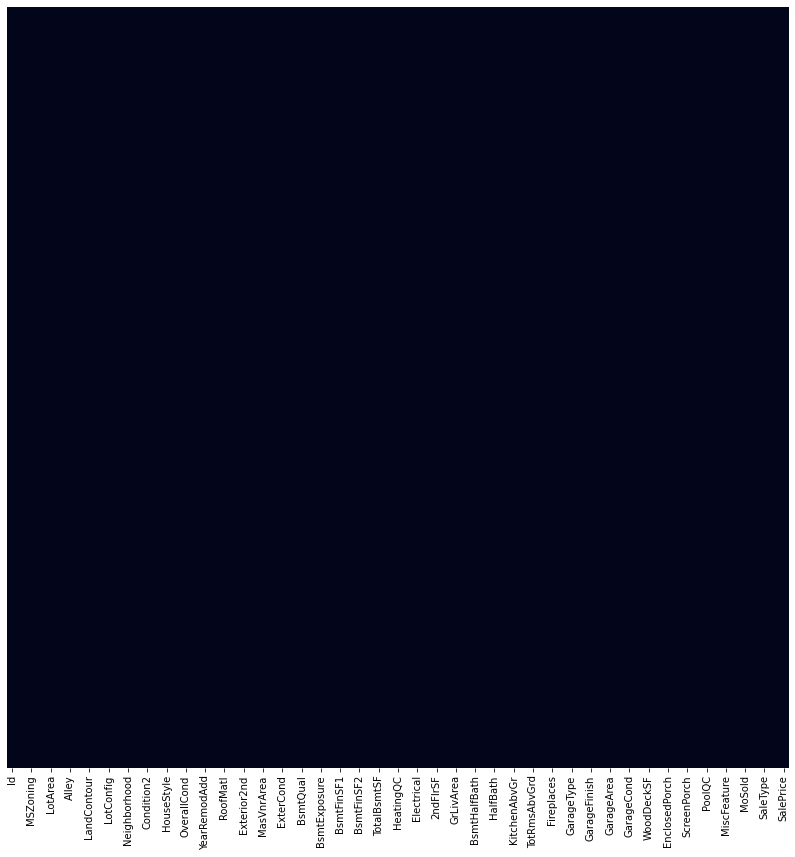

In [13]:
#now lets check the null values
plt.figure(figsize=(14,14))
sns.heatmap(df_train.isnull(),yticklabels=False,cbar=False);

In [14]:
df_train.isnull().sum().sort_values(ascending=False).head(20)

Id              0
CentralAir      0
GarageYrBlt     0
GarageType      0
FireplaceQu     0
Fireplaces      0
Functional      0
TotRmsAbvGrd    0
KitchenQual     0
KitchenAbvGr    0
BedroomAbvGr    0
HalfBath        0
FullBath        0
BsmtHalfBath    0
BsmtFullBath    0
GrLivArea       0
LowQualFinSF    0
2ndFlrSF        0
1stFlrSF        0
GarageFinish    0
dtype: int64

We can conclude that the missing value has been treated

In [15]:
#loading the test file
df_test=pd.read_csv('housing_test.csv')

In [16]:
df_test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,337,20,RL,86.0,14157,Pave,NaN,IR1,HLS,AllPub,Corner,Gtl,StoneBr,Norm,Norm,1Fam,1Story,9,5,2005,2006,Hip,CompShg,VinylSd,VinylSd,Stone,200.0,Gd,TA,PConc,Ex,TA,Gd,GLQ,1249,Unf,0,673,1922,GasA,Ex,Y,SBrkr,1922,0,0,1922,1,0,2,0,3,1,Gd,8,Typ,1,Gd,Attchd,2005.0,Fin,3,676,TA,TA,Y,178,51,0,0,0,0,NaN,NaN,NaN,0,7,2007,WD,Normal
1,1018,120,RL,NaN,5814,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1984,1984,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,CBlock,Gd,TA,Av,GLQ,1036,Unf,0,184,1220,GasA,Gd,Y,SBrkr,1360,0,0,1360,1,0,1,0,1,1,Gd,4,Typ,1,Ex,Attchd,1984.0,RFn,2,565,TA,TA,Y,63,0,0,0,0,0,NaN,NaN,NaN,0,8,2009,COD,Abnorml
2,929,20,RL,NaN,11838,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,8,5,2001,2001,Hip,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,Unf,0,Unf,0,1753,1753,GasA,Ex,Y,SBrkr,1788,0,0,1788,0,0,2,0,3,1,Ex,7,Typ,1,TA,Attchd,2001.0,RFn,2,522,TA,TA,Y,202,151,0,0,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal
3,1148,70,RL,75.0,12000,Pave,NaN,Reg,Bnk,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,7,1941,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,275,Unf,0,429,704,GasA,Ex,Y,SBrkr,860,704,0,1564,0,0,1,1,3,1,Fa,7,Typ,1,Gd,Attchd,1941.0,Unf,1,234,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,7,2009,WD,Normal
4,1227,60,RL,86.0,14598,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Somerst,Feedr,Norm,1Fam,2Story,6,5,2007,2007,Gable,CompShg,VinylSd,VinylSd,Stone,74.0,Gd,TA,PConc,Gd,TA,Mn,Unf,0,Unf,0,894,894,GasA,Ex,Y,SBrkr,894,1039,0,1933,0,0,2,1,4,1,Gd,9,Typ,1,Gd,BuiltIn,2007.0,Fin,3,668,TA,TA,Y,100,18,0,0,0,0,NaN,NaN,NaN,0,1,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,83,20,RL,78.0,10206,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2007,2007,Gable,CompShg,VinylSd,VinylSd,Stone,468.0,TA,TA,PConc,Gd,TA,No,GLQ,33,Unf,0,1530,1563,GasA,Ex,Y,SBrkr,1563,0,0,1563,0,0,2,0,3,1,Gd,6,Typ,1,Gd,Attchd,2007.0,RFn,3,758,TA,TA,Y,144,99,0,0,0,0,NaN,NaN,NaN,0,10,2008,WD,Normal
288,1048,20,RL,57.0,9245,Pave,NaN,IR2,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,5,5,1994,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,686,Unf,0,304,990,GasA,Ex,Y,SBrkr,990,0,0,990,0,1,1,0,3,1,TA,5,Typ,0,NaN,Detchd,1996.0,Unf,2,672,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
289,17,20,RL,NaN,11241,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,7,1970,1970,Gable,CompShg,Wd Sdng,Wd Sdng,BrkFace,180.0,TA,TA,CBlock,TA,TA,No,ALQ,578,Unf,0,426,1004,GasA,Ex,Y,SBrkr,1004,0,0,1004,1,0,1,0,2,1,TA,5,Typ,1,TA,Attchd,1970.0,Fin,2,480,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,Shed,700,3,2010,WD,Normal
290,523,50,RM,50.0,5000,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Feedr,Norm,1Fam,1.5Fin,6,7,1947,1950,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,Gd,CBlock,TA,TA,No,ALQ,399,Unf,0,605,1004,GasA,Ex,Y,SBrkr,1004,660,0,1664,0,0,2,0,3,1,TA,7,Typ,2,Gd,Detchd,1950.0,Unf

In [17]:
df_test.isnull().sum().sort_values(ascending=False).head(20)

PoolQC          292
MiscFeature     282
Alley           278
Fence           248
FireplaceQu     139
LotFrontage      45
GarageType       17
GarageYrBlt      17
GarageQual       17
GarageCond       17
GarageFinish     17
BsmtCond          7
BsmtFinType2      7
BsmtFinType1      7
BsmtQual          7
BsmtExposure      7
MasVnrArea        1
MasVnrType        1
Electrical        1
HalfBath          0
dtype: int64

We will treat the null value same for test data set as well

In [18]:
#PopolQC NA stands for No Pool
df_test['PoolQC'].fillna('No_Pool',inplace=True)

#Miscfeature NA stands for none
df_test['MiscFeature'].fillna('None',inplace=True)

#Alley NA stands for No alley access, we will fill it with no alley
df_test['Alley'].fillna('No_Alley',inplace=True)

#Fence NA stands for No fence
df_test['Fence'].fillna('No_Fence',inplace=True)

#FireplaceQu NA stands for No fireplace
df_test['FireplaceQu'].fillna('No_Fireplace',inplace=True)

#GarageFinish, GarageType, GarageQual and GarageCond all 4 feature has NA as No garage
columns=['GarageFinish','GarageType','GarageQual','GarageCond']
for i in columns:
    df_test[i].fillna('No_Garage',inplace=True)
    
#BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2, NA stands for No_basement
columns2=['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2']
for j in columns2:
    df_test[j].fillna('No_Basement',inplace=True)

In [19]:
df_test['LotFrontage'].fillna(df_test['LotFrontage'].median(),inplace=True)
df_test['MasVnrArea'].fillna(df_test['MasVnrArea'].median(),inplace=True)

In [20]:
df_test['GarageYrBlt'] = df_train['GarageYrBlt'].fillna('0')
df_test['MasVnrType'] = df_train['MasVnrType'].fillna('None')

In [21]:
df_test['Electrical'].unique()

array(['SBrkr', 'FuseA', 'FuseP', nan, 'FuseF'], dtype=object)

In [22]:
df_test['Electrical'] = df_train['Electrical'].fillna('mode')

In [23]:
df_test.isnull().sum().sort_values(ascending=False).head(20)

Id              0
MSSubClass      0
GarageType      0
FireplaceQu     0
Fireplaces      0
Functional      0
TotRmsAbvGrd    0
KitchenQual     0
KitchenAbvGr    0
BedroomAbvGr    0
HalfBath        0
FullBath        0
BsmtHalfBath    0
BsmtFullBath    0
GrLivArea       0
LowQualFinSF    0
2ndFlrSF        0
1stFlrSF        0
Electrical      0
GarageYrBlt     0
dtype: int64

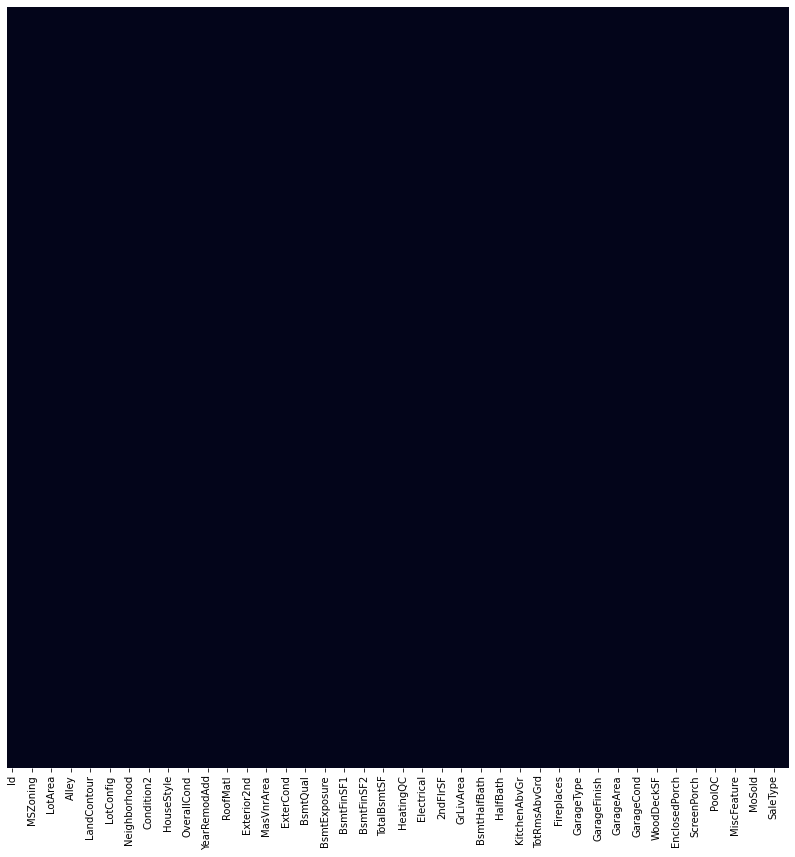

In [24]:
#now lets check the null values for test dataset
plt.figure(figsize=(14,14))
sns.heatmap(df_test.isnull(),yticklabels=False,cbar=False);

##### Statistical summary

In [25]:
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000
mean,724.136130,56.767979,70.807363,10484.749144,6.104452,5.595890,1970.930651,1984.758562,101.696918,444.726027,46.647260,569.721747,1061.095034,1169.860445,348.826199,6.380137,1525.066781,0.425514,0.055651,1.562500,0.388699,2.884418,1.045377,6.542808,0.617295,1.776541,476.860445,96.206336,46.559932,23.015411,3.639555,15.051370,3.448630,47.315068,6.344178,2007.804795,181477.005993
std,416.159877,41.940650,22.440317,8957.442311,1.390153,1.124343,30.145255,20.785185,182.218483,462.664785,163.520016,449.375525,442.272249,391.161983,439.696370,50.892844,528.042957,0.521615,0.236699,0.551882,0.504929,0.817229,0.216292,1.598484,0.650575,0.745554,214.466769,126.158988,66.381023,63.191089,29.088867,55.080816,44.896939,543.264432,2.686352,1.329738,79105.586863
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1875.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,360.500000,20.000000,60.000000,7621.500000,5.000000,5.000000,1954.000000,1966.000000,0.000000,0.000000,0.000000,216.000000,799.000000,892.000000,0.000000,0.000000,1143.250000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1.000000,338.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,130375.000000
50%,714.500000,50.000000,70.000000,9522.500000,6.000000,5.000000,1972.000000,1993.000000,0.000000,385.500000,0.000000,474.000000,1005.500000,1096.500000,0.000000,0.000000,1468.500000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,2.000000,480.000000,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163995.000000
75%,1079.500000,70.000000,79.250000,11515.500000,7.000000,6.000000,2000.000000,2004.000000,160.000000,714.500000,0.000000,816.000000,1291.500000,1392.000000,729.000000,0.000000,1795.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2.000000,576.000000,171.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,215000.000000
max,1460.000000,190.000000,313.000000,164660.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


##### Observation:

1. Maximum standard deviation of 8957.44 is observed in LotArea column.

2. Maximum SalePrice of a house observed is 755000 and minimum is 34900.

3. In the columns Id, MSSubclass, LotArea, MasVnrArea, BsmtFinSF1, BsmtFinSF2, BsmtUnfsF, TotalBsmtSF, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, HalfBath, TotRmsAbvGrd, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, Miscval, salePrice mean is considerably greater than median so the columns are positively skewed.

4. In the columns FullBath, BedroomAbvGr, Fireplaces, Garagecars, GarageArea, YrSold Median is greater than mean so the columns are negatively skewed.

5. In the columns Id, MSSubClass, LotFrontage, LotArea, MasVnrArea, BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtHalfBath, BedroomAbvGr, ToRmsAbvGrd, GarageArea, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, MiscVal, SalePrice there is considerable difference between the 75 percentile and maximum so outliers are present.

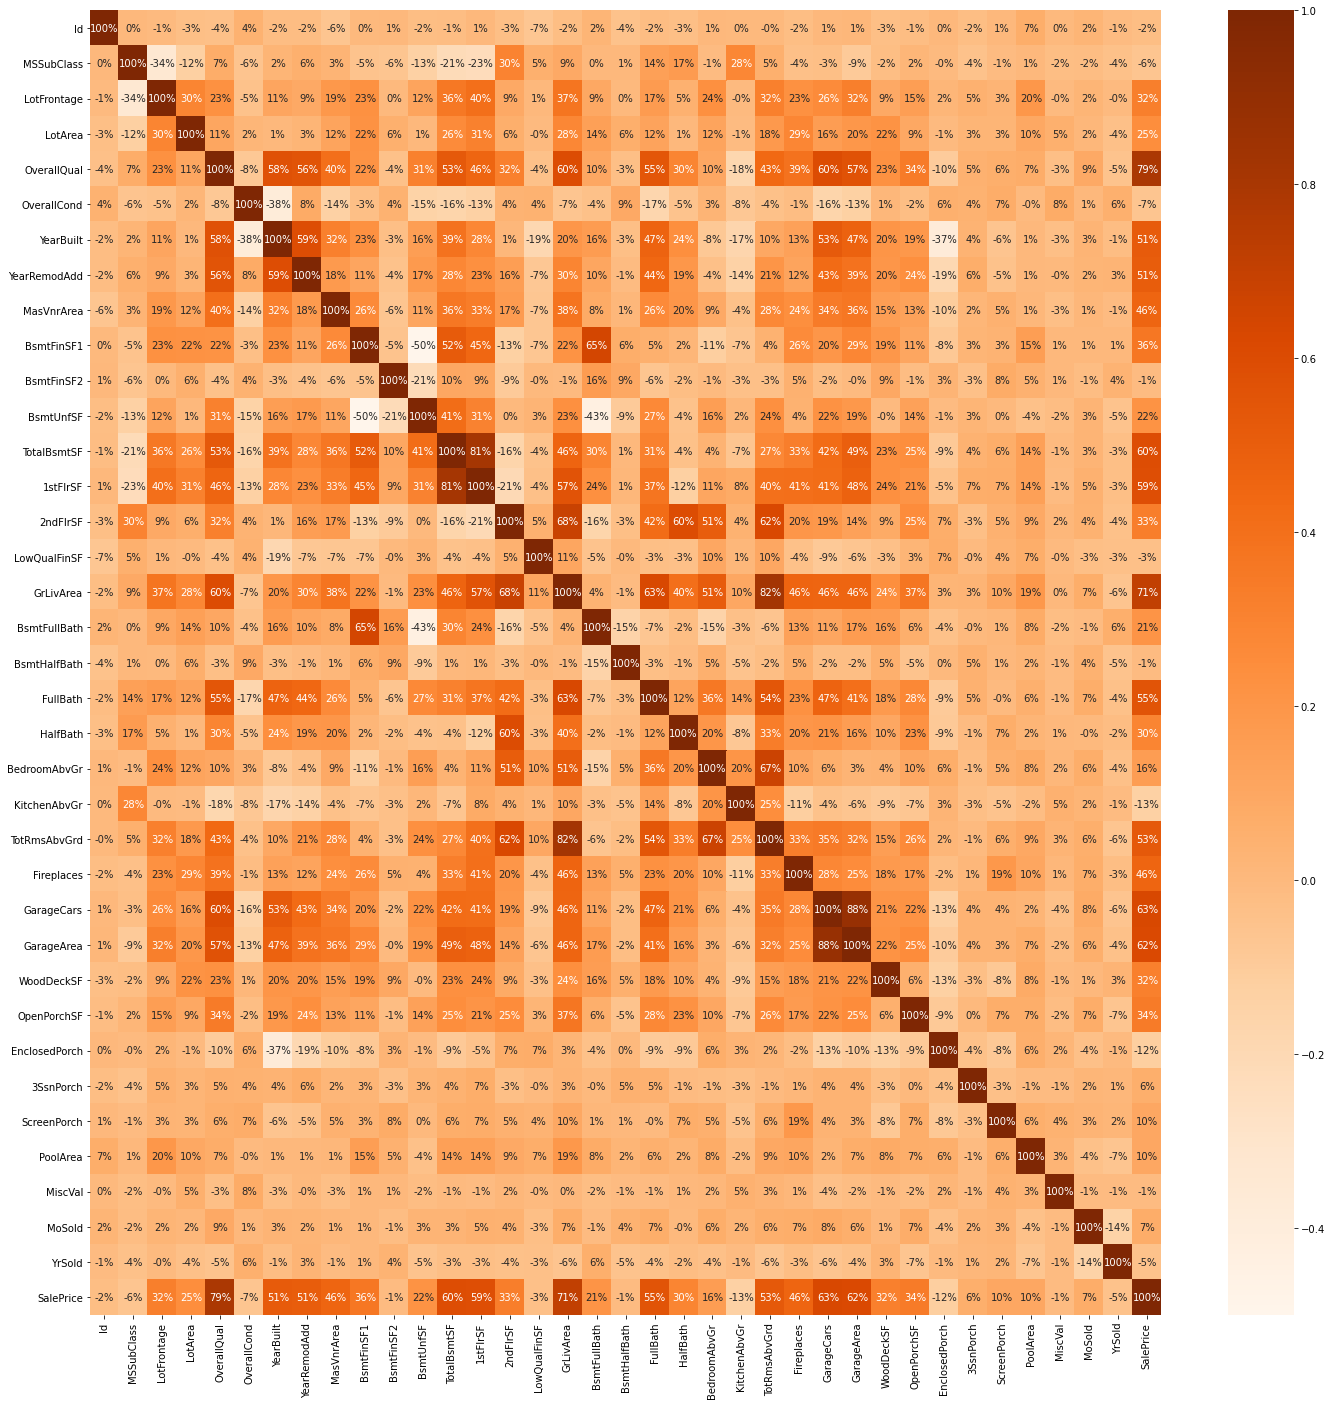

In [26]:
#Lets check the corelation

df_train_cor=df_train.corr()

plt.figure(figsize=(24,24))
sns.heatmap(df_train_cor,annot=True,fmt='.0%',cmap='Oranges')
plt.show()

#### Data Visualization

Text(0.5, 1.0, 'Mean House Price vs YearSold')

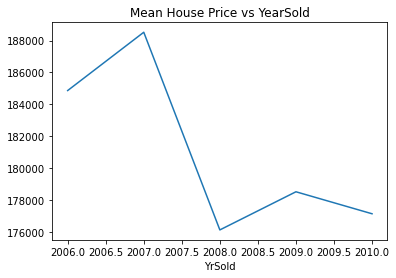

In [27]:
# Analyzing Prices of House vs Year Built
df_train.groupby('YrSold')['SalePrice'].mean().plot()
plt.title("Mean House Price vs YearSold")

There seems to be a peak in House Prices, but a sharp drop in between 2007 to 2008

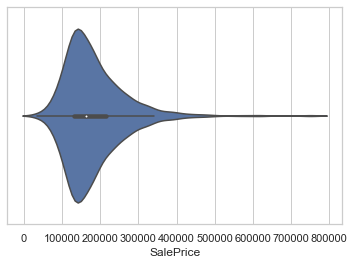

In [33]:
# Let's Check the target variable

sns.set(style='whitegrid')
sns.violinplot(df_train['SalePrice'])
plt.show()

#### Observation:

Maximum number of SalePrice lies between 140000 and 230000.

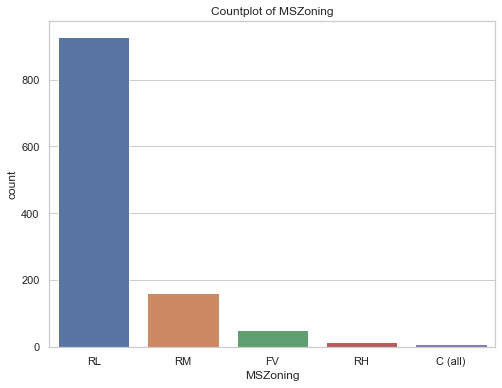

In [34]:
# Let's check the column MsZoning

plt.subplots(figsize=(8,6))
sns.countplot(x="MSZoning", data=df_train)
plt.title("Countplot of MSZoning")
plt.xlabel('MSZoning')
plt.ylabel("count")
plt.show()

#### Observation:

Maximum, 928 number of MSZoning are RL.


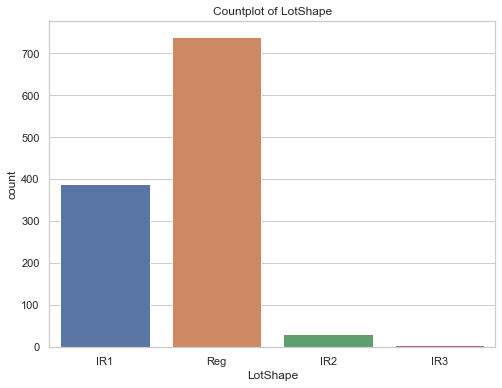

In [36]:
# Let's check the column LotShape

plt.subplots(figsize=(8,6))
sns.countplot(x="LotShape", data=df_train)
plt.title("Countplot of LotShape")
plt.xlabel('LotShape')
plt.ylabel("count")
plt.show()

#### Observation:

Maximum, 740 number of LotShape are Reg.


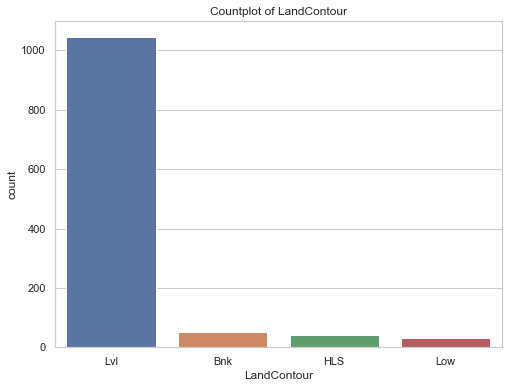

In [37]:
# Let's check the column LandContour

plt.subplots(figsize=(8,6))
sns.countplot(x="LandContour", data=df_train)
plt.title("Countplot of LandContour")
plt.xlabel('LandContour')
plt.ylabel("count")
plt.show()

#### Observation:

Maximum, 1046 number of LandContour are Lvl.


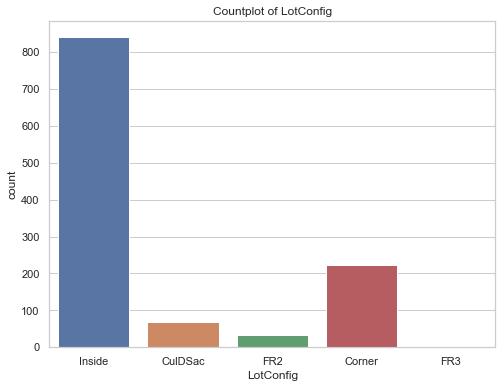

In [38]:
# Let's check the column LotConfig

plt.subplots(figsize=(8,6))
sns.countplot(x="LotConfig", data=df_train)
plt.title("Countplot of LotConfig")
plt.xlabel('LotConfig')
plt.ylabel("count")
plt.show()

#### Observation:

Maximum, 842 number of LotConfig are Inside.

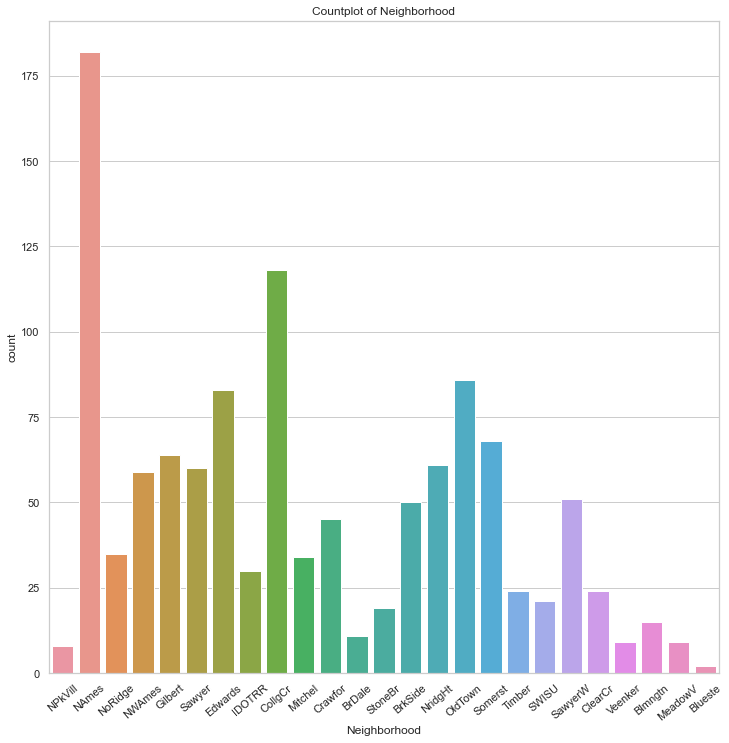

In [39]:
# Let's check the column Neighborhood

plt.subplots(figsize=(12,12))
sns.countplot(x="Neighborhood", data=df_train)
plt.title("Countplot of Neighborhood")
plt.xticks(rotation=40)
plt.xlabel('Neighborhood')
plt.ylabel("count")
plt.show()

#### Observation:

Maximum, 182 number of Neighborhood are Names.


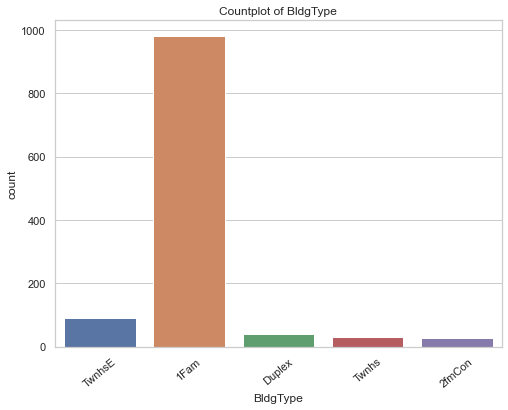

In [40]:
# Let's check the column BldgType

plt.subplots(figsize=(8,6))
sns.countplot(x="BldgType", data=df_train)
plt.title("Countplot of BldgType")
plt.xticks(rotation=40)
plt.xlabel('BldgType')
plt.ylabel("count")
plt.show()

#### Observation:

Maximum, 981 number of BldgType are 1Fam.

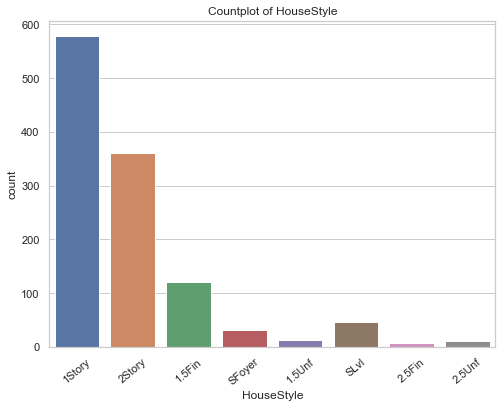

In [41]:
# Let's check the column HouseStyle

plt.subplots(figsize=(8,6))
sns.countplot(x="HouseStyle", data=df_train)
plt.title("Countplot of HouseStyle")
plt.xticks(rotation=40)
plt.xlabel('HouseStyle')
plt.ylabel("count")
plt.show()

#### Observation:

1 Story has highest number of count followed by 2Story, 1.5Fin, SlvL etc

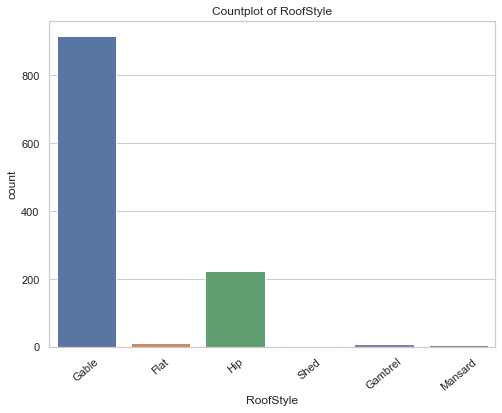

In [42]:
# Let's check the column RoofStyle

plt.subplots(figsize=(8,6))
sns.countplot(x="RoofStyle", data=df_train)
plt.title("Countplot of RoofStyle")
plt.xticks(rotation=40)
plt.xlabel('RoofStyle')
plt.ylabel("count")
plt.show()

#### Observation:

Maximum, 915 number of RoofStyle are Gable.

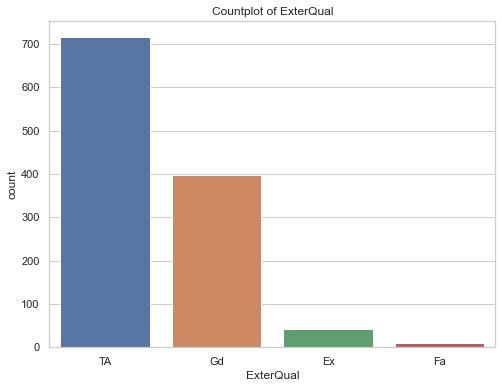

In [43]:
# Let's check the column ExterQual

plt.subplots(figsize=(8,6))
sns.countplot(x="ExterQual", data=df_train)
plt.title("Countplot of ExterQual")
plt.xlabel('ExterQual')
plt.ylabel("count")
plt.show()

#### Observation:

Maximum, 717 number of ExterQual is TA.


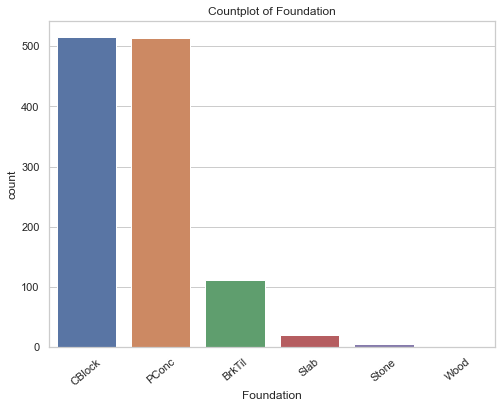

In [44]:
# Let's checking the column Foundation

plt.subplots(figsize=(8,6))
sns.countplot(x="Foundation", data=df_train)
plt.title("Countplot of Foundation")
plt.xticks(rotation=40)
plt.xlabel('Foundation')
plt.ylabel("count")
plt.show()

#### Observation:

Maximum, 516 number of Foundation are CBlock.

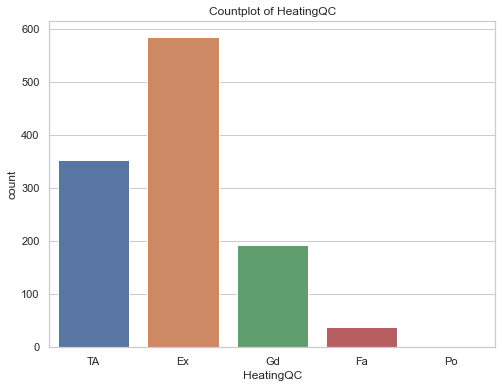

In [45]:
# Let's check the column HeatingQC

plt.subplots(figsize=(8,6))
sns.countplot(x="HeatingQC", data=df_train)
plt.title("Countplot of HeatingQC")
plt.xlabel('HeatingQC')
plt.ylabel("count")
plt.show()

#### Observation:

Maximum, 585 number of HeatingQC is Ex.

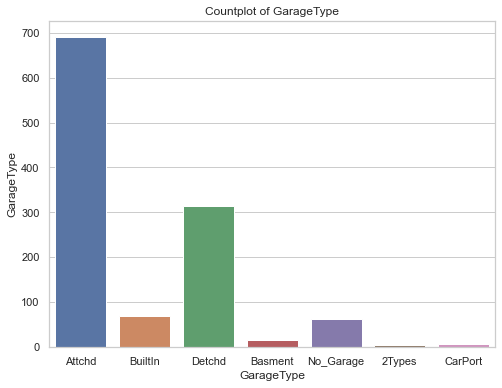

In [47]:
# Let's check the column GarageType

plt.subplots(figsize=(8,6))
sns.countplot(x="GarageType", data=df_train)
plt.title("Countplot of GarageType")
plt.xlabel('GarageType')
plt.ylabel("GarageType")
plt.show()

#### Observation:

Maximum, 691 number of GarageType are Attchd.

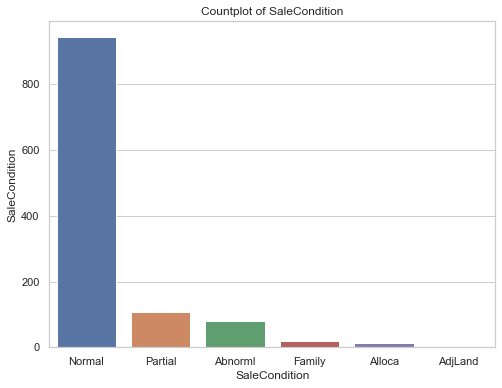

In [48]:
# Let's check the column SaleCondition

plt.subplots(figsize=(8,6))
sns.countplot(x="SaleCondition", data=df_train)
plt.title("Countplot of SaleCondition")
plt.xlabel('SaleCondition')
plt.ylabel("SaleCondition")
plt.show()

#### Observation:

Maximum, 945 number of SaleCondition is normal.

In [46]:
categorical_features=[feature for feature in df_train.columns if df_train[feature].dtypes=='O']
df_train[categorical_features].head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,No_Alley,IR1,Lvl,AllPub,Inside,Gtl,NPkVill,Norm,Norm,TwnhsE,1Story,Gable,CompShg,Plywood,Plywood,None,TA,TA,CBlock,Gd,TA,No,ALQ,Unf,GasA,TA,Y,SBrkr,TA,Typ,TA,Attchd,1977.0,RFn,TA,TA,Y,No_Pool,No_Fence,None,WD,Normal
1,RL,Pave,No_Alley,IR1,Lvl,AllPub,Inside,Mod,NAmes,Norm,Norm,1Fam,1Story,Flat,Tar&Grv,Wd Sdng,Wd Sdng,None,Gd,Gd,PConc,TA,Gd,Gd,ALQ,Rec,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,1970.0,Unf,TA,TA,Y,No_Pool,No_Fence,None,WD,Normal
2,RL,Pave,No_Alley,IR1,Lvl,AllPub,CulDSac,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,MetalSd,MetalSd,None,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,1997.0,Unf,TA,TA,Y,No_Pool,No_Fence,None,WD,Normal
3,RL,Pave,No_Alley,IR1,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,Plywood,Plywood,BrkFace,TA,TA,CBlock,Gd,TA,No,BLQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,1977.0,RFn,TA,TA,Y,No_Pool,MnPrv,None,COD,Normal
4,RL,Pave,No_Alley,IR1,Lvl,AllPub,FR2,Gtl,NWAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,CemntBd,CmentBd,Stone,Gd,TA,CBlock,Gd,TA,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,TA,Attchd,1977.0,Fin,TA,TA,Y,No_Pool,No_Fence,None,WD,Normal


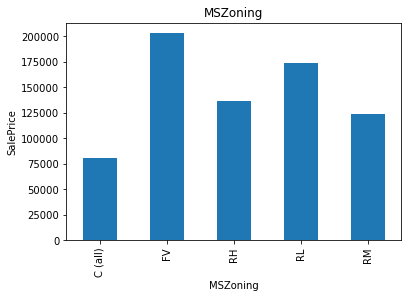

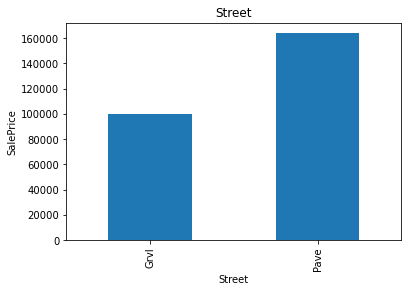

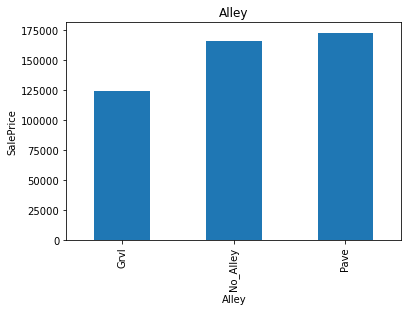

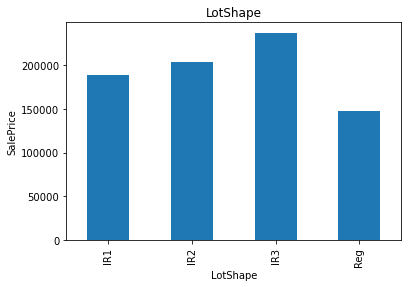

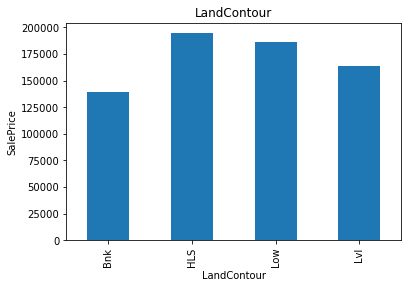

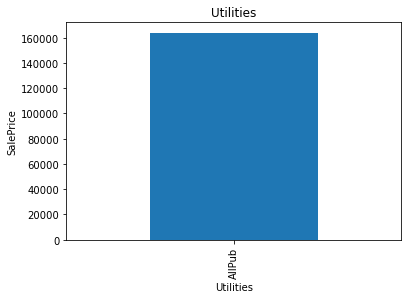

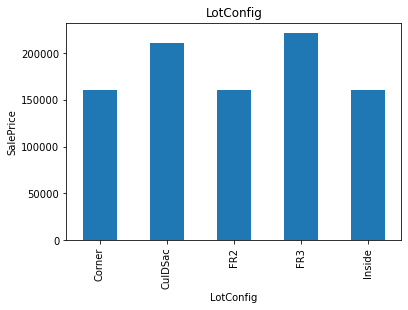

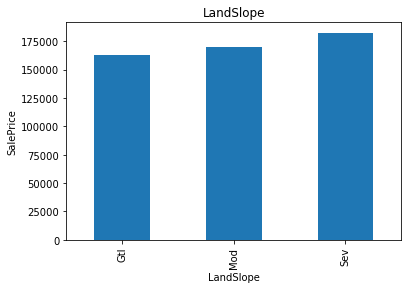

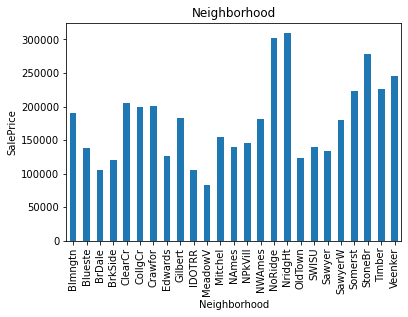

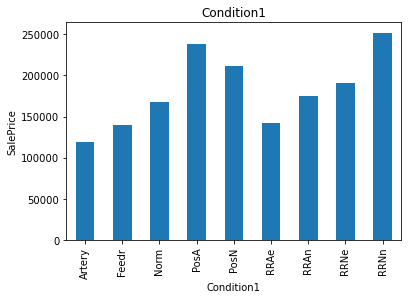

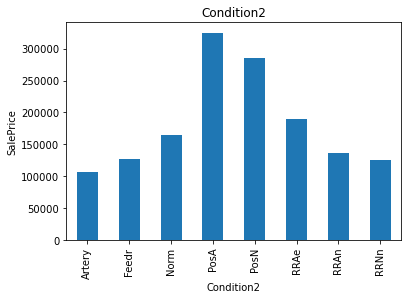

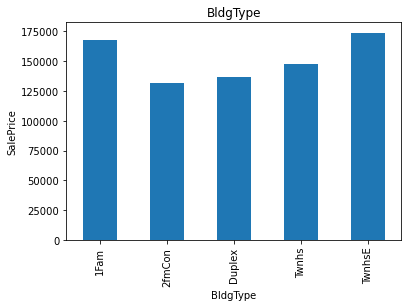

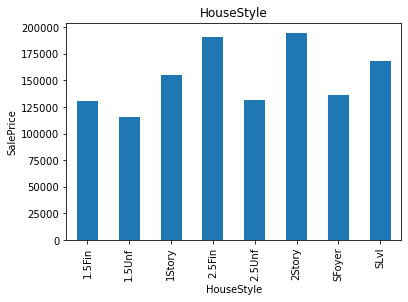

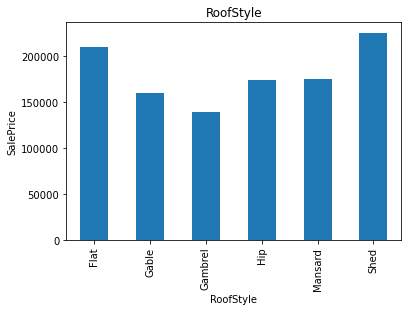

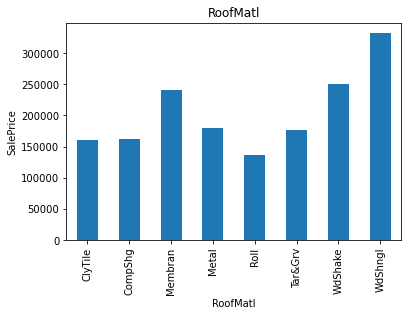

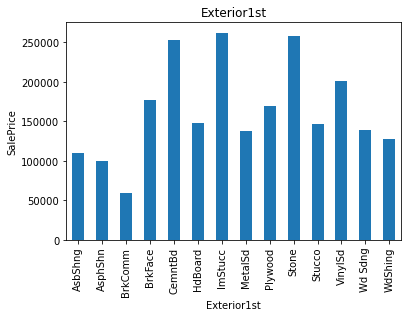

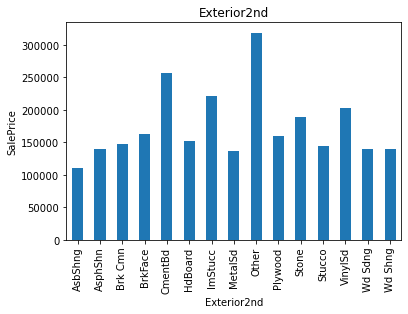

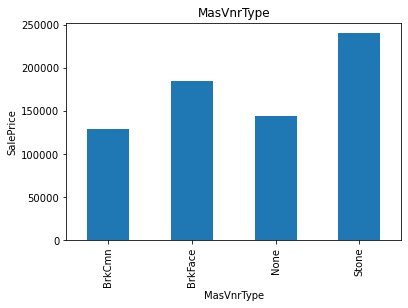

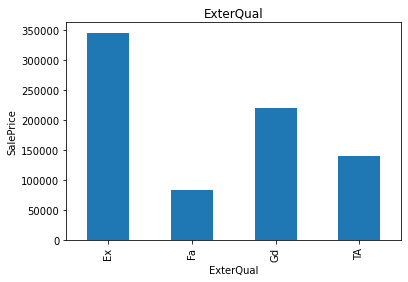

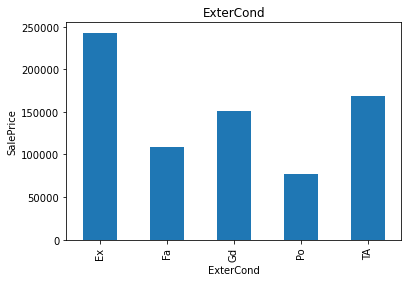

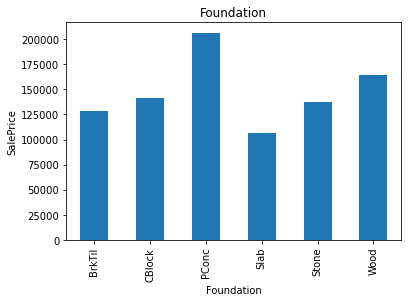

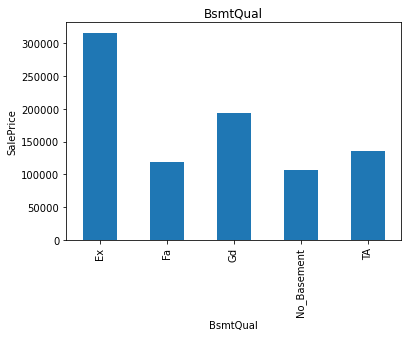

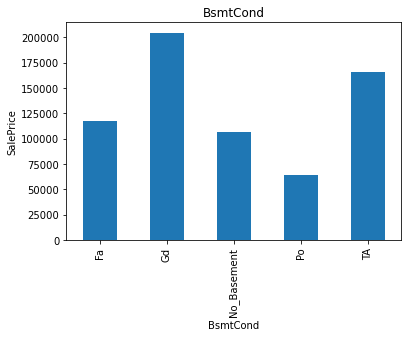

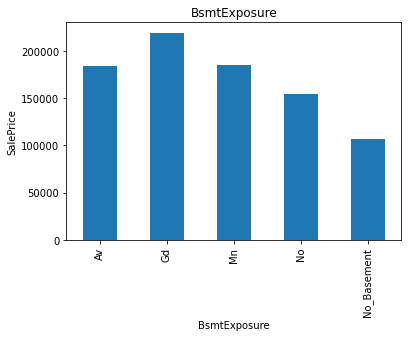

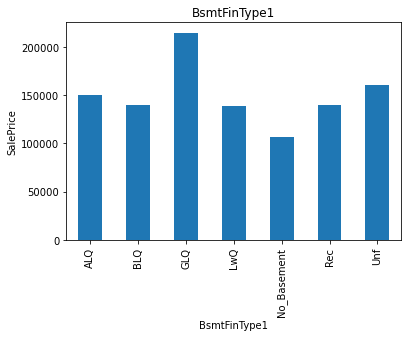

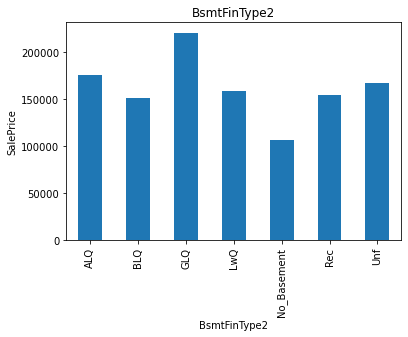

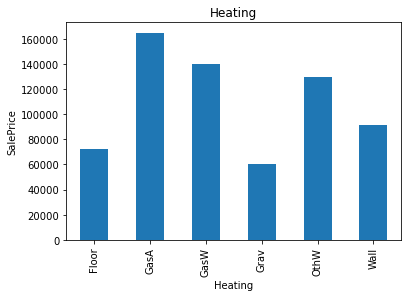

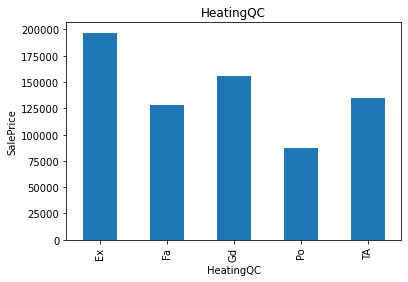

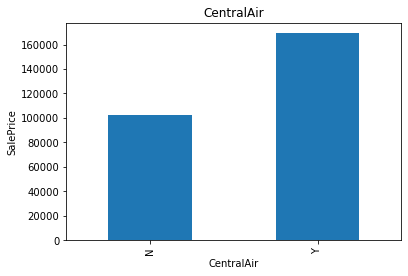

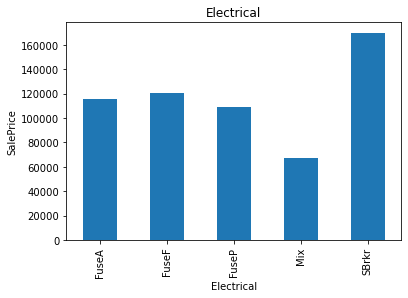

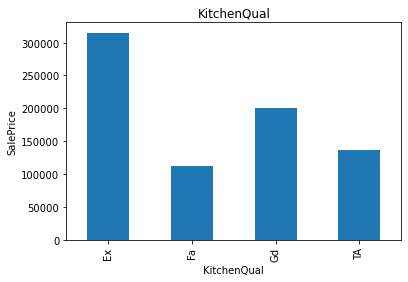

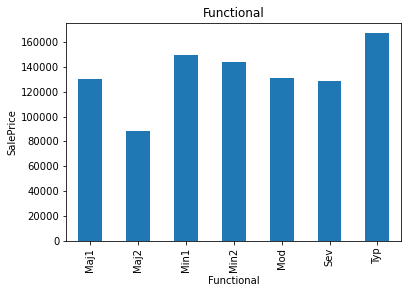

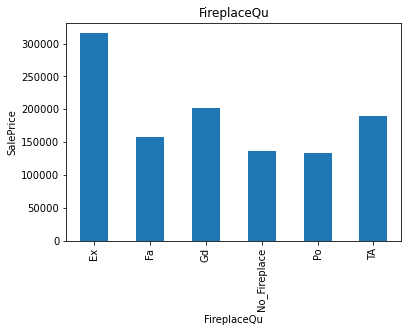

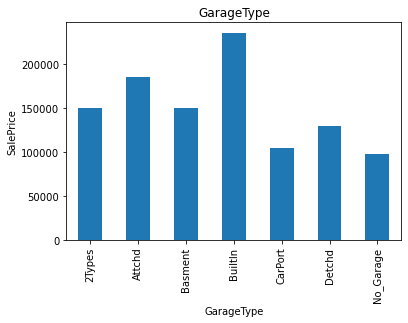

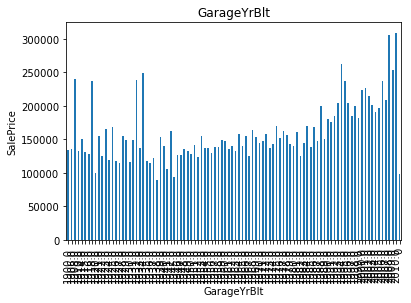

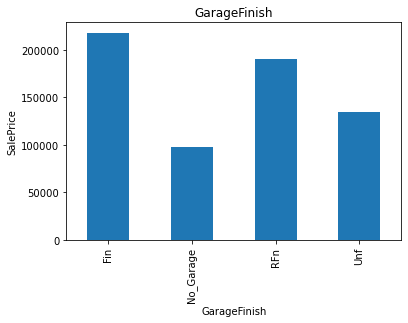

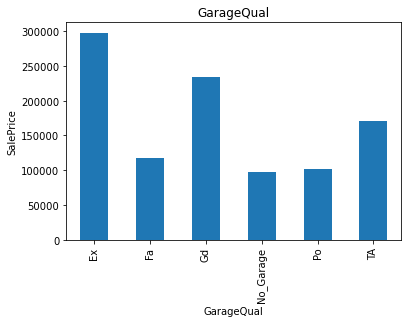

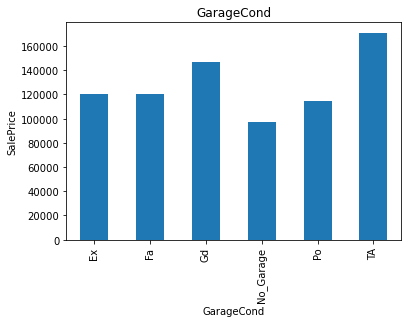

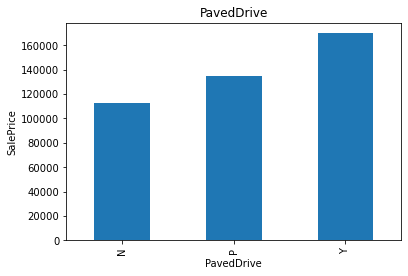

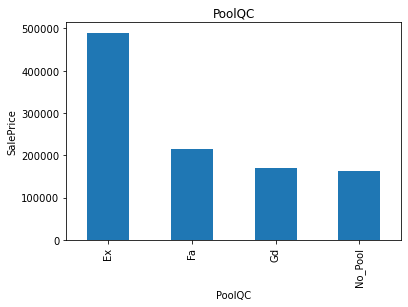

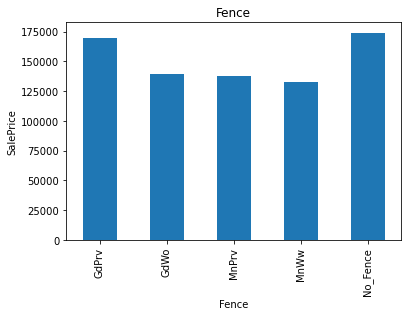

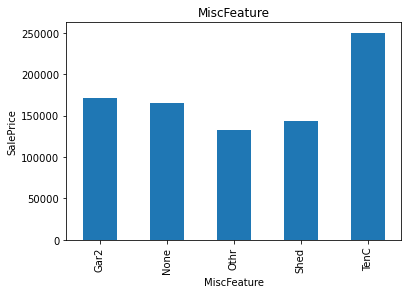

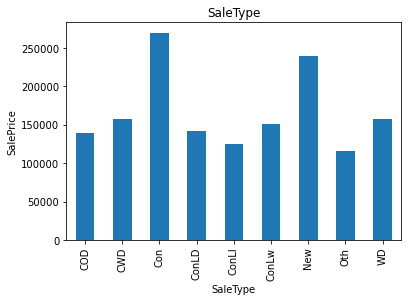

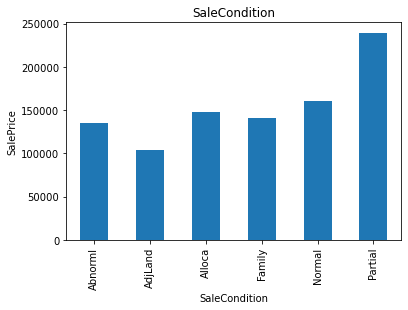

In [29]:
# Categorical variables vs SalesPrice
for feature in categorical_features:
    data=df_train.copy()
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()

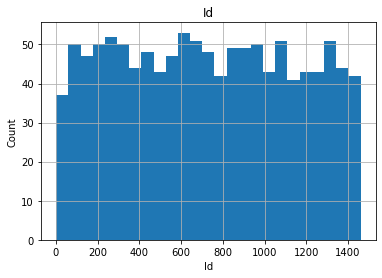

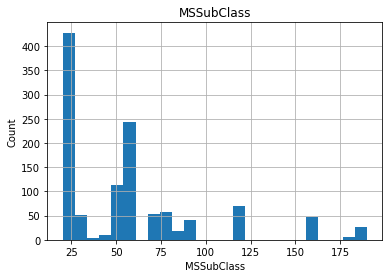

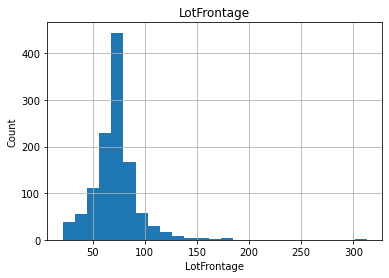

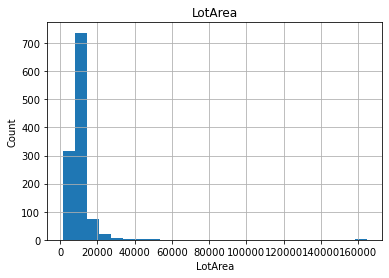

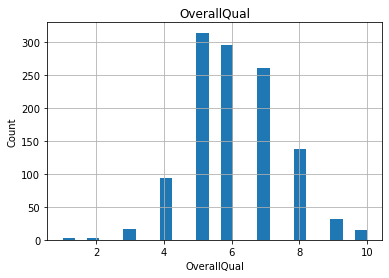

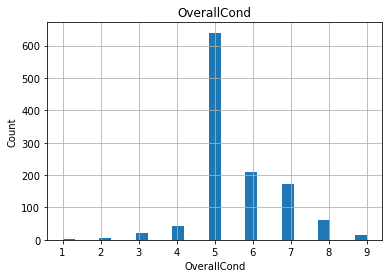

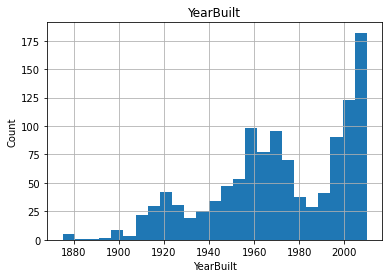

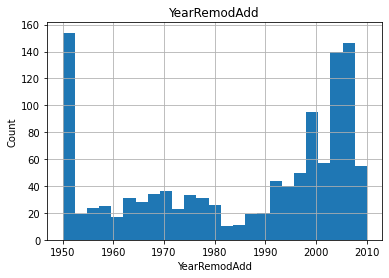

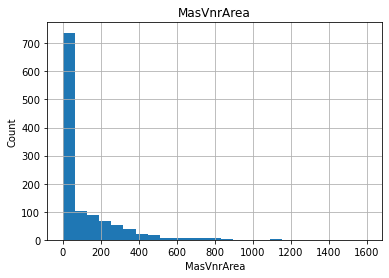

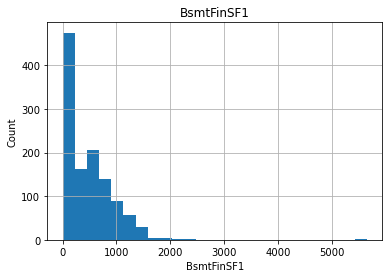

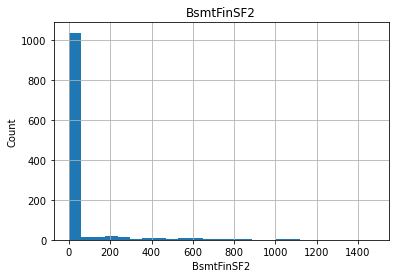

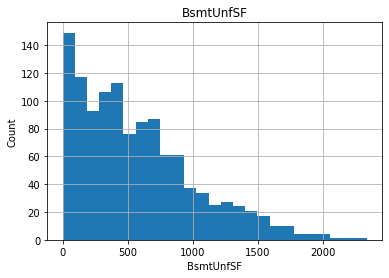

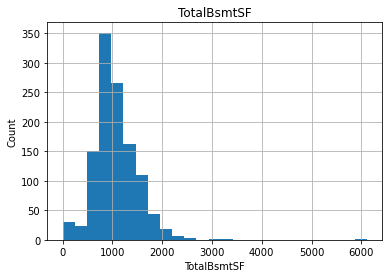

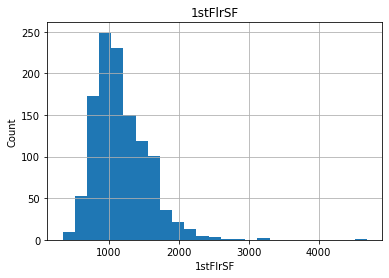

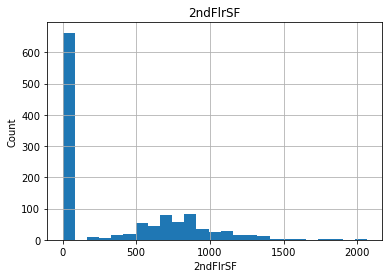

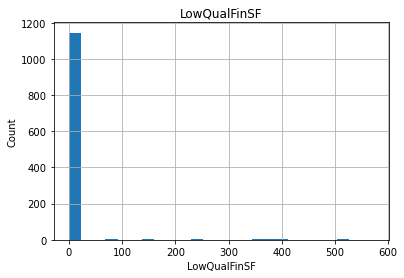

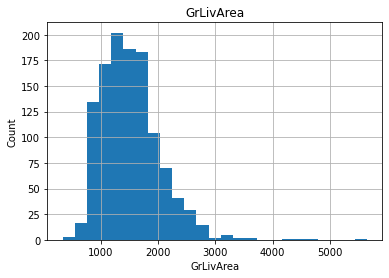

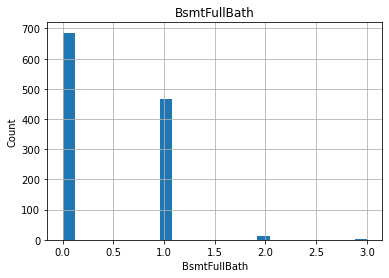

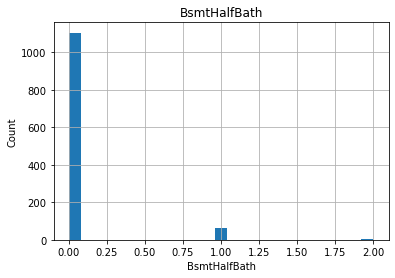

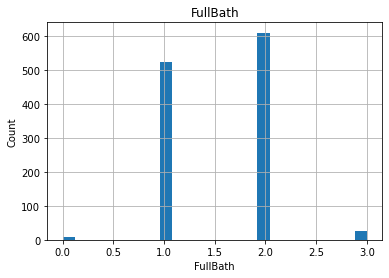

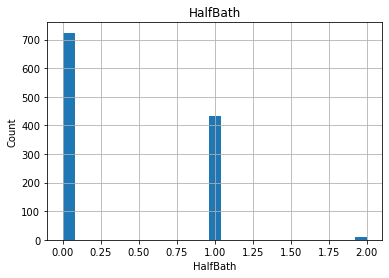

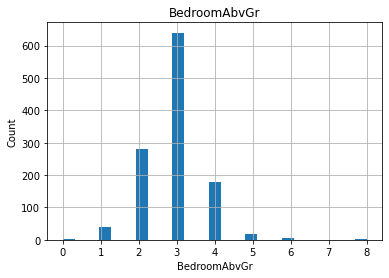

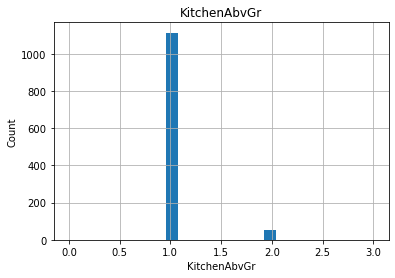

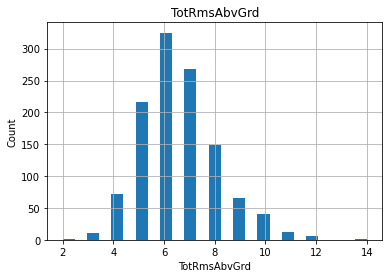

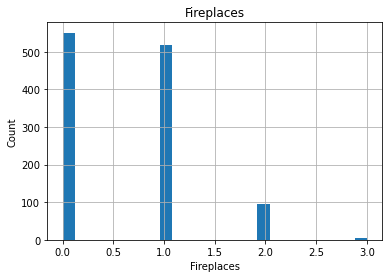

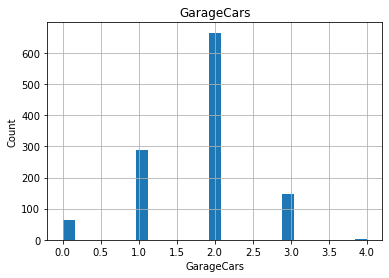

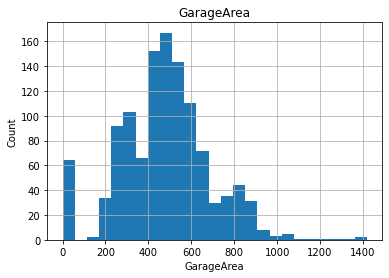

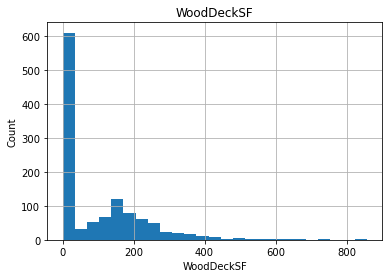

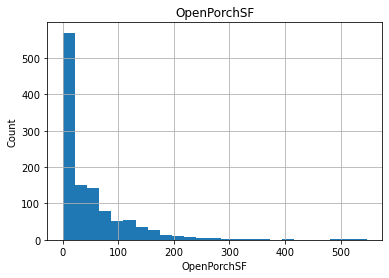

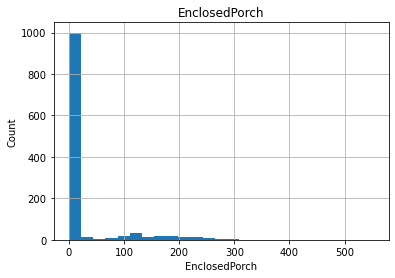

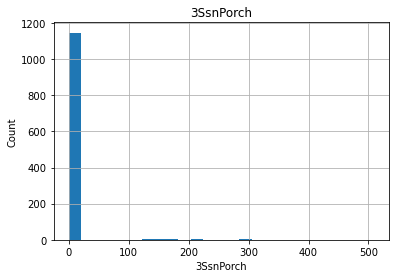

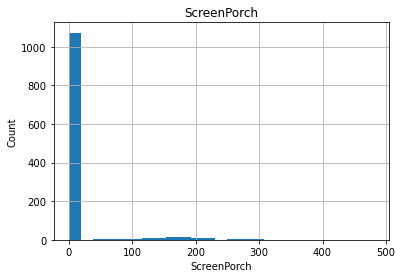

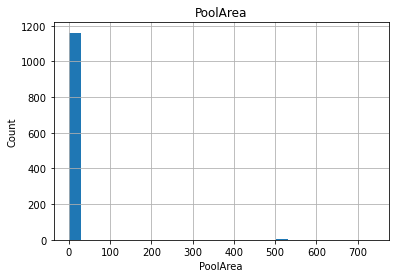

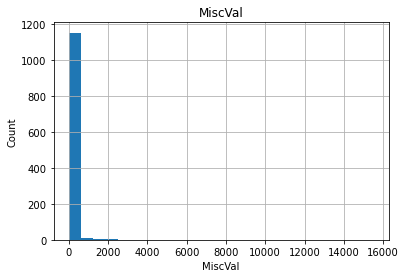

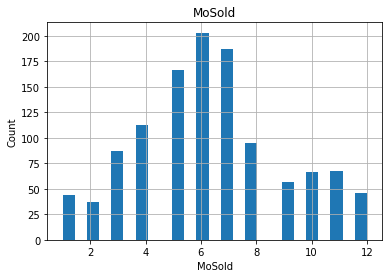

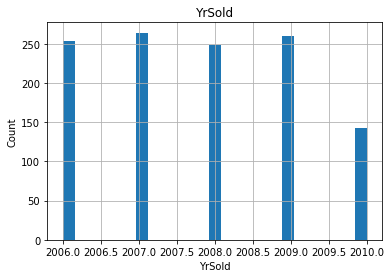

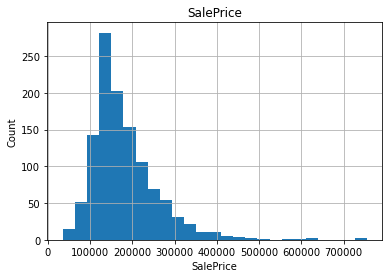

In [30]:
# Let's plot the histogram of every numerical column

for col in df_train.describe().columns:
    data=df_train.copy()
    data[col].hist(bins=25)
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.title(col)
    plt.show()

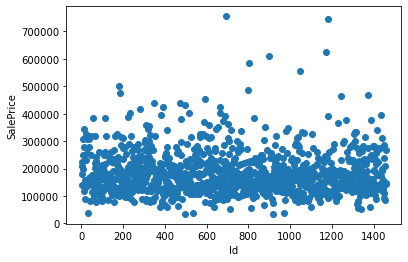

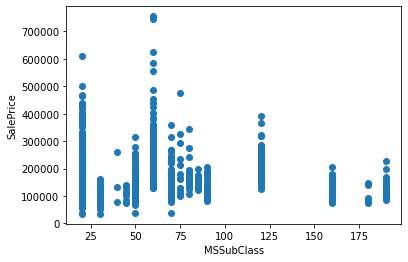

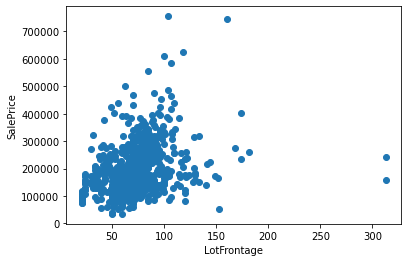

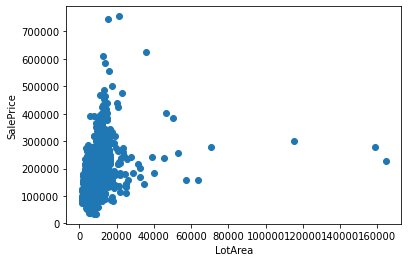

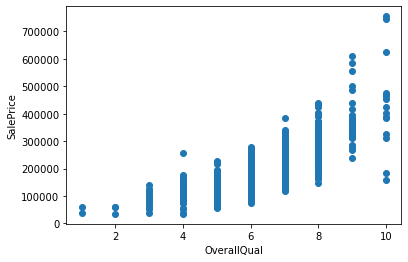

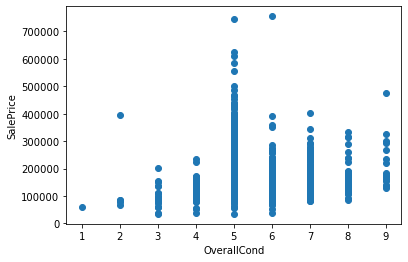

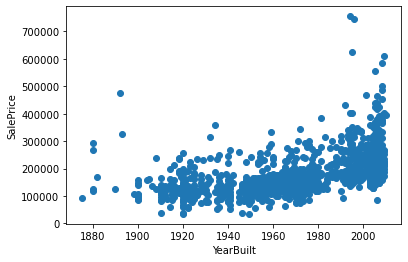

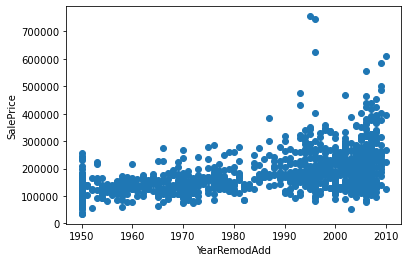

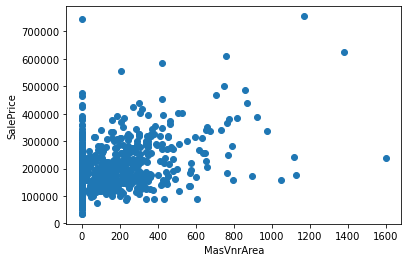

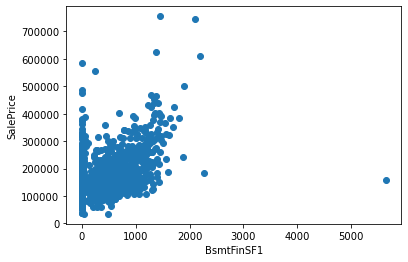

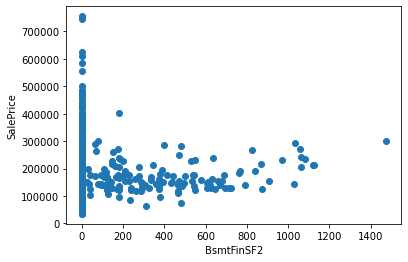

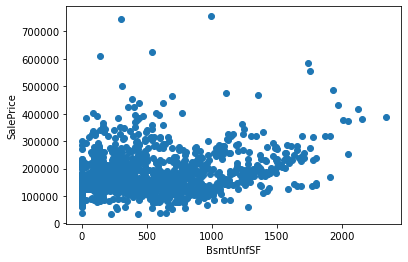

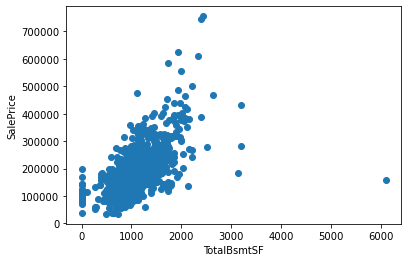

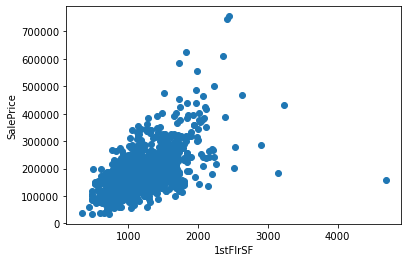

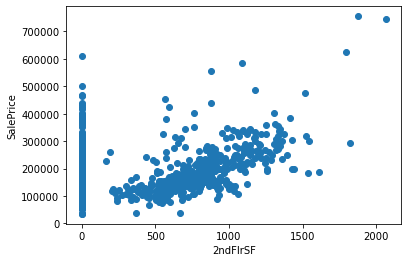

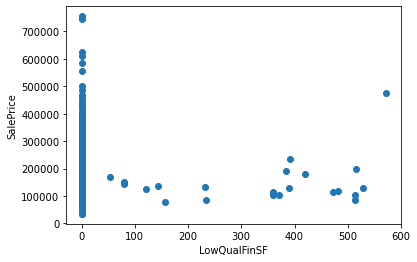

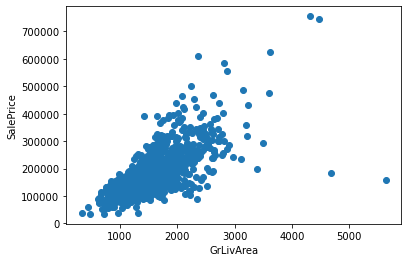

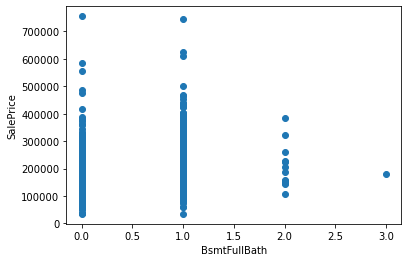

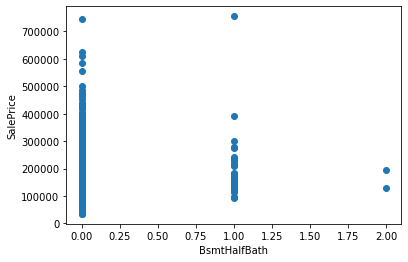

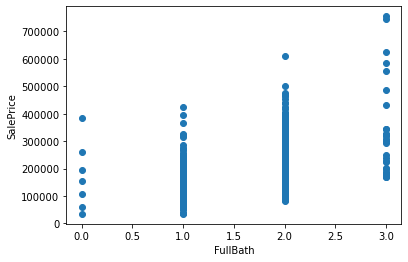

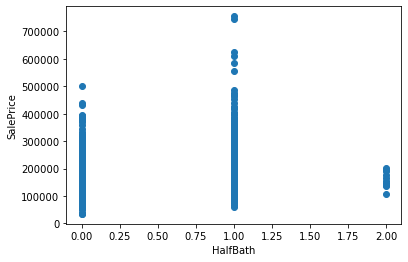

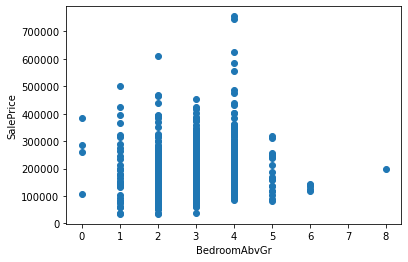

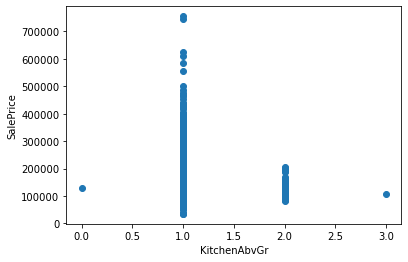

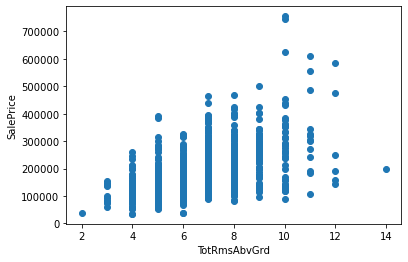

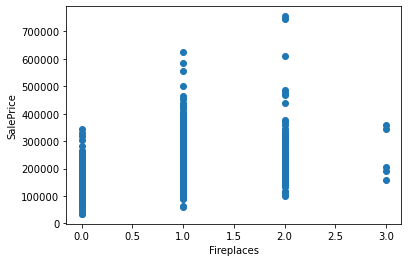

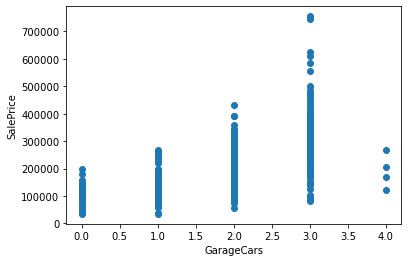

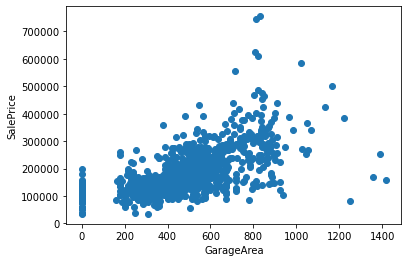

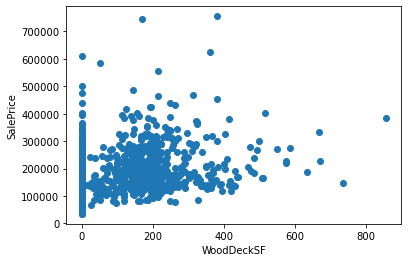

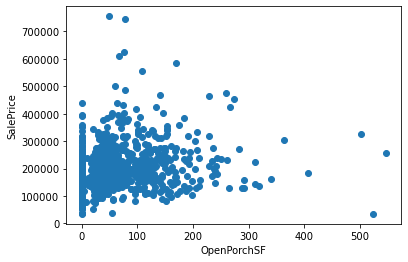

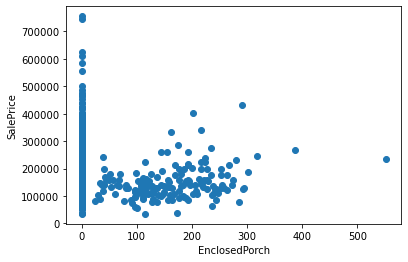

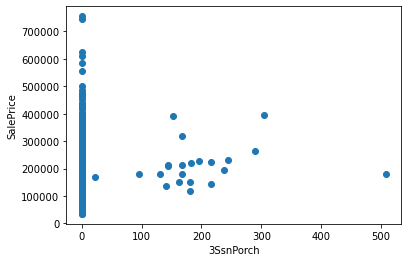

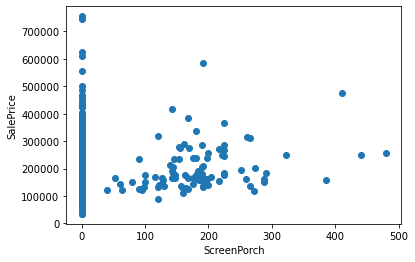

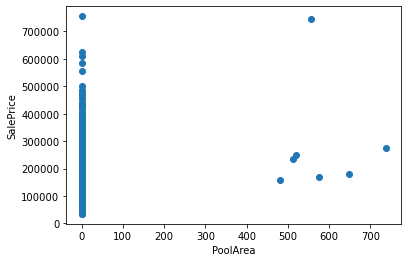

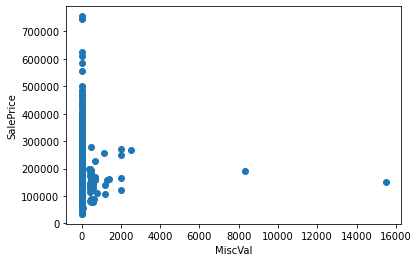

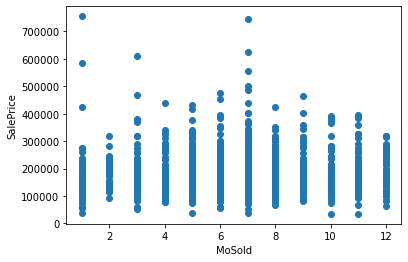

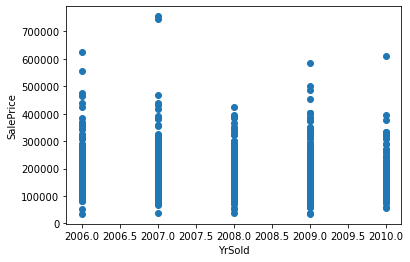

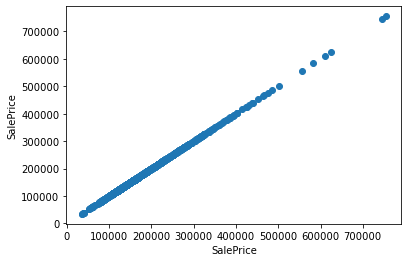

In [31]:
# Let's plot the Scatter plot between all feature variables and target variable
for col in df_train.describe().columns:
    data=df_train.copy()
    plt.scatter(data[col],data['SalePrice'])
    plt.xlabel(col)
    plt.ylabel('SalePrice')
    plt.show()

In [49]:
df_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,RL,70.0,4928,Pave,No_Alley,IR1,Lvl,AllPub,Inside,Gtl,NPkVill,Norm,Norm,TwnhsE,1Story,6,5,1976,1976,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,ALQ,120,Unf,0,958,1078,GasA,TA,Y,SBrkr,958,0,0,958,0,0,2,0,2,1,TA,5,Typ,1,TA,Attchd,1977.0,RFn,2,440,TA,TA,Y,0,205,0,0,0,0,No_Pool,No_Fence,None,0,2,2007,WD,Normal,128000
1,889,20,RL,95.0,15865,Pave,No_Alley,IR1,Lvl,AllPub,Inside,Mod,NAmes,Norm,Norm,1Fam,1Story,8,6,1970,1970,Flat,Tar&Grv,Wd Sdng,Wd Sdng,None,0.0,Gd,Gd,PConc,TA,Gd,Gd,ALQ,351,Rec,823,1043,2217,GasA,Ex,Y,SBrkr,2217,0,0,2217,1,0,2,0,4,1,Gd,8,Typ,1,TA,Attchd,1970.0,Unf,2,621,TA,TA,Y,81,207,0,0,224,0,No_Pool,No_Fence,None,0,10,2007,WD,Normal,268000
2,793,60,RL,92.0,9920,Pave,No_Alley,IR1,Lvl,AllPub,CulDSac,Gtl,NoRidge,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,MetalSd,MetalSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,GLQ,862,Unf,0,255,1117,GasA,Ex,Y,SBrkr,1127,886,0,2013,1,0,2,1,3,1,TA,8,Typ,1,TA,Attchd,1997.0,Unf,2,455,TA,TA,Y,180,130,0,0,0,0,No_Pool,No_Fence,None,0,6,2007,WD,Normal,269790
3,110,20,RL,105.0,11751,Pave,No_Alley,IR1,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1977,1977,Hip,CompShg,Plywood,Plywood,BrkFace,480.0,TA,TA,CBlock,Gd,TA,No,BLQ,705,Unf,0,1139,1844,GasA,Ex,Y,SBrkr,1844,0,0,1844,0,0,2,0,3,1,TA,7,Typ,1,TA,Attchd,1977.0,RFn,2,546,TA,TA,Y,0,122,0,0,0,0,No_Pool,MnPrv,None,0,1,2010,COD,Normal,190000
4,422,20,RL,70.0,16635,Pave,No_Alley,IR1,Lvl,AllPub,FR2,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,7,1977,2000,Gable,CompShg,CemntBd,CmentBd,Stone,126.0,Gd,TA,CBlock,Gd,TA,No,ALQ,1246,Unf,0,356,1602,GasA,Gd,Y,SBrkr,1602,0,0,1602,0,1,2,0,3,1,Gd,8,Typ,1,TA,Attchd,1977.0,Fin,2,529,TA,TA,Y,240,0,0,0,0,0,No_Pool,No_Fence,None,0,6,2009,WD,Normal,215000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,289,20,RL,70.0,9819,Pave,No_Alley,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,1Story,5,5,1967,1967,Gable,CompShg,MetalSd,MetalSd,BrkFace,31.0,TA,Gd,CBlock,TA,TA,No,BLQ,450,Unf,0,432,882,GasA,TA,Y,SBrkr,900,0,0,900,0,0,1,0,3,1,TA,5,Typ,0,No_Fireplace,Detchd,1970.0,Unf,1,280,TA,TA,Y,0,0,0,0,0,0,No_Pool,MnPrv,None,0,2,2010,WD,Normal,122000
1164,554,20,RL,67.0,8777,Pave,No_Alley,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Feedr,Norm,1Fam,1Story,4,5,1949,2003,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,No_Basement,No_Basement,No_Basement,No_Basement,0,No_Basement,0,0,0,GasA,Ex,Y,SBrkr,1126,0,0,1126,0,0,2,0,2,1,Gd,5,Typ,0,No_Fireplace,Detchd,2002.0,Fin,2,520,TA,TA,N,0,96,0,0,0,0,No_Pool,MnPrv,None,0,5,2009,WD,Normal,108000
1165,196,160,RL,24.0,2280,Pave,No_Alley,Reg,Lvl,AllPub,FR2,Gtl,NPkVill,Norm,Norm,Twnhs,2Story,6,6,1976,1976,Gable,CompShg,Plywood,Brk Cmn,None,0.0,TA,TA,CBlock,Gd,TA,No,ALQ,566,Unf,0,289,855,GasA,TA,Y,SBrkr,855,601,0,1456,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1976.0,Unf,2,440,TA,TA,Y,87,0,0,0,0,0,No_Pool,No_Fence,None,0,7,2009,WD,Normal,148500
1166,31,70,C (all),50.0,8500

In [50]:
#lets drop theId columns as it will not help us with the data modeling
df_train.drop(['Id'], axis = 1,inplace=True)

In [51]:
df_train

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,120,RL,70.0,4928,Pave,No_Alley,IR1,Lvl,AllPub,Inside,Gtl,NPkVill,Norm,Norm,TwnhsE,1Story,6,5,1976,1976,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,ALQ,120,Unf,0,958,1078,GasA,TA,Y,SBrkr,958,0,0,958,0,0,2,0,2,1,TA,5,Typ,1,TA,Attchd,1977.0,RFn,2,440,TA,TA,Y,0,205,0,0,0,0,No_Pool,No_Fence,None,0,2,2007,WD,Normal,128000
1,20,RL,95.0,15865,Pave,No_Alley,IR1,Lvl,AllPub,Inside,Mod,NAmes,Norm,Norm,1Fam,1Story,8,6,1970,1970,Flat,Tar&Grv,Wd Sdng,Wd Sdng,None,0.0,Gd,Gd,PConc,TA,Gd,Gd,ALQ,351,Rec,823,1043,2217,GasA,Ex,Y,SBrkr,2217,0,0,2217,1,0,2,0,4,1,Gd,8,Typ,1,TA,Attchd,1970.0,Unf,2,621,TA,TA,Y,81,207,0,0,224,0,No_Pool,No_Fence,None,0,10,2007,WD,Normal,268000
2,60,RL,92.0,9920,Pave,No_Alley,IR1,Lvl,AllPub,CulDSac,Gtl,NoRidge,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,MetalSd,MetalSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,GLQ,862,Unf,0,255,1117,GasA,Ex,Y,SBrkr,1127,886,0,2013,1,0,2,1,3,1,TA,8,Typ,1,TA,Attchd,1997.0,Unf,2,455,TA,TA,Y,180,130,0,0,0,0,No_Pool,No_Fence,None,0,6,2007,WD,Normal,269790
3,20,RL,105.0,11751,Pave,No_Alley,IR1,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1977,1977,Hip,CompShg,Plywood,Plywood,BrkFace,480.0,TA,TA,CBlock,Gd,TA,No,BLQ,705,Unf,0,1139,1844,GasA,Ex,Y,SBrkr,1844,0,0,1844,0,0,2,0,3,1,TA,7,Typ,1,TA,Attchd,1977.0,RFn,2,546,TA,TA,Y,0,122,0,0,0,0,No_Pool,MnPrv,None,0,1,2010,COD,Normal,190000
4,20,RL,70.0,16635,Pave,No_Alley,IR1,Lvl,AllPub,FR2,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,7,1977,2000,Gable,CompShg,CemntBd,CmentBd,Stone,126.0,Gd,TA,CBlock,Gd,TA,No,ALQ,1246,Unf,0,356,1602,GasA,Gd,Y,SBrkr,1602,0,0,1602,0,1,2,0,3,1,Gd,8,Typ,1,TA,Attchd,1977.0,Fin,2,529,TA,TA,Y,240,0,0,0,0,0,No_Pool,No_Fence,None,0,6,2009,WD,Normal,215000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,20,RL,70.0,9819,Pave,No_Alley,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,1Story,5,5,1967,1967,Gable,CompShg,MetalSd,MetalSd,BrkFace,31.0,TA,Gd,CBlock,TA,TA,No,BLQ,450,Unf,0,432,882,GasA,TA,Y,SBrkr,900,0,0,900,0,0,1,0,3,1,TA,5,Typ,0,No_Fireplace,Detchd,1970.0,Unf,1,280,TA,TA,Y,0,0,0,0,0,0,No_Pool,MnPrv,None,0,2,2010,WD,Normal,122000
1164,20,RL,67.0,8777,Pave,No_Alley,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Feedr,Norm,1Fam,1Story,4,5,1949,2003,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,No_Basement,No_Basement,No_Basement,No_Basement,0,No_Basement,0,0,0,GasA,Ex,Y,SBrkr,1126,0,0,1126,0,0,2,0,2,1,Gd,5,Typ,0,No_Fireplace,Detchd,2002.0,Fin,2,520,TA,TA,N,0,96,0,0,0,0,No_Pool,MnPrv,None,0,5,2009,WD,Normal,108000
1165,160,RL,24.0,2280,Pave,No_Alley,Reg,Lvl,AllPub,FR2,Gtl,NPkVill,Norm,Norm,Twnhs,2Story,6,6,1976,1976,Gable,CompShg,Plywood,Brk Cmn,None,0.0,TA,TA,CBlock,Gd,TA,No,ALQ,566,Unf,0,289,855,GasA,TA,Y,SBrkr,855,601,0,1456,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1976.0,Unf,2,440,TA,TA,Y,87,0,0,0,0,0,No_Pool,No_Fence,None,0,7,2009,WD,Normal,148500
1166,70,C (all),50.0,8500,Pave,Pave,Reg,Lvl,AllPub,Inside,Gtl,IDOTR

In [52]:
#we will drop it from test data as well
df_test.drop(['Id'], axis = 1,inplace=True)

In [53]:
df_test

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RL,86.0,14157,Pave,No_Alley,IR1,HLS,AllPub,Corner,Gtl,StoneBr,Norm,Norm,1Fam,1Story,9,5,2005,2006,Hip,CompShg,VinylSd,VinylSd,None,200.0,Gd,TA,PConc,Ex,TA,Gd,GLQ,1249,Unf,0,673,1922,GasA,Ex,Y,SBrkr,1922,0,0,1922,1,0,2,0,3,1,Gd,8,Typ,1,Gd,Attchd,1977.0,Fin,3,676,TA,TA,Y,178,51,0,0,0,0,No_Pool,No_Fence,None,0,7,2007,WD,Normal
1,120,RL,65.0,5814,Pave,No_Alley,IR1,Lvl,AllPub,CulDSac,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1984,1984,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,CBlock,Gd,TA,Av,GLQ,1036,Unf,0,184,1220,GasA,Gd,Y,SBrkr,1360,0,0,1360,1,0,1,0,1,1,Gd,4,Typ,1,Ex,Attchd,1970.0,RFn,2,565,TA,TA,Y,63,0,0,0,0,0,No_Pool,No_Fence,None,0,8,2009,COD,Abnorml
2,20,RL,65.0,11838,Pave,No_Alley,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,8,5,2001,2001,Hip,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,Unf,0,Unf,0,1753,1753,GasA,Ex,Y,SBrkr,1788,0,0,1788,0,0,2,0,3,1,Ex,7,Typ,1,TA,Attchd,1997.0,RFn,2,522,TA,TA,Y,202,151,0,0,0,0,No_Pool,No_Fence,None,0,6,2009,WD,Normal
3,70,RL,75.0,12000,Pave,No_Alley,Reg,Bnk,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,7,1941,1950,Gable,CompShg,MetalSd,MetalSd,BrkFace,0.0,TA,TA,CBlock,TA,TA,No,Rec,275,Unf,0,429,704,GasA,Ex,Y,SBrkr,860,704,0,1564,0,0,1,1,3,1,Fa,7,Typ,1,Gd,Attchd,1977.0,Unf,1,234,TA,TA,Y,0,0,0,0,0,0,No_Pool,No_Fence,None,0,7,2009,WD,Normal
4,60,RL,86.0,14598,Pave,No_Alley,IR1,Lvl,AllPub,CulDSac,Gtl,Somerst,Feedr,Norm,1Fam,2Story,6,5,2007,2007,Gable,CompShg,VinylSd,VinylSd,Stone,74.0,Gd,TA,PConc,Gd,TA,Mn,Unf,0,Unf,0,894,894,GasA,Ex,Y,SBrkr,894,1039,0,1933,0,0,2,1,4,1,Gd,9,Typ,1,Gd,BuiltIn,1977.0,Fin,3,668,TA,TA,Y,100,18,0,0,0,0,No_Pool,No_Fence,None,0,1,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,20,RL,78.0,10206,Pave,No_Alley,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2007,2007,Gable,CompShg,VinylSd,VinylSd,BrkFace,468.0,TA,TA,PConc,Gd,TA,No,GLQ,33,Unf,0,1530,1563,GasA,Ex,Y,SBrkr,1563,0,0,1563,0,0,2,0,3,1,Gd,6,Typ,1,Gd,Attchd,1984.0,RFn,3,758,TA,TA,Y,144,99,0,0,0,0,No_Pool,No_Fence,None,0,10,2008,WD,Normal
288,20,RL,57.0,9245,Pave,No_Alley,IR2,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,5,5,1994,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,686,Unf,0,304,990,GasA,Ex,Y,SBrkr,990,0,0,990,0,1,1,0,3,1,TA,5,Typ,0,No_Fireplace,Detchd,1949.0,Unf,2,672,TA,TA,Y,0,0,0,0,0,0,No_Pool,No_Fence,None,0,2,2008,WD,Normal
289,20,RL,65.0,11241,Pave,No_Alley,IR1,Lvl,AllPub,CulDSac,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,7,1970,1970,Gable,CompShg,Wd Sdng,Wd Sdng,None,180.0,TA,TA,CBlock,TA,TA,No,ALQ,578,Unf,0,426,1004,GasA,Ex,Y,FuseA,1004,0,0,1004,1,0,1,0,2,1,TA,5,Typ,1,TA,Attchd,1949.0,Fin,2,480,TA,TA,Y,0,0,0,0,0,0,No_Pool,No_Fence,Shed,700,3,2010,WD,Normal
290,50,RM,50.0,5000,Pave,No_Alley,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Feedr,Norm,1Fam,1.5Fin,6,7,1947,1950,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,Gd,CBlock,TA,TA,No,ALQ,39

#### Checking for skewness

In [54]:
#lets check for skewness
df_train.skew()

MSSubClass        1.422019
LotFrontage       2.733440
LotArea          10.659285
OverallQual       0.175082
OverallCond       0.580714
YearBuilt        -0.579204
YearRemodAdd     -0.495864
MasVnrArea        2.835718
BsmtFinSF1        1.871606
BsmtFinSF2        4.365829
BsmtUnfSF         0.909057
TotalBsmtSF       1.744591
1stFlrSF          1.513707
2ndFlrSF          0.823479
LowQualFinSF      8.666142
GrLivArea         1.449952
BsmtFullBath      0.627106
BsmtHalfBath      4.264403
FullBath          0.057809
HalfBath          0.656492
BedroomAbvGr      0.243855
KitchenAbvGr      4.365259
TotRmsAbvGrd      0.644657
Fireplaces        0.671966
GarageYrBlt      -3.898694
GarageCars       -0.358556
GarageArea        0.189665
WoodDeckSF        1.504929
OpenPorchSF       2.410840
EnclosedPorch     3.043610
3SsnPorch         9.770611
ScreenPorch       4.105741
PoolArea         13.243711
MiscVal          23.065943
MoSold            0.220979
YrSold            0.115765
SalePrice         1.953878
d

In [62]:
numerical_feature=[feature for feature in df_train.columns if feature not in categorical_features]
print("Numerical Feature Count",len(numerical_feature))

Numerical Feature Count 36


In [63]:
#There is lot of skewness in the data. Lets treat them

for col in df_train[numerical_feature].columns:
    if df_train.skew().loc[col]>0.55 and col!='SalePrice':
        df_train[col]=np.log1p(df_train[col])

In [64]:
df_train.skew()

MSSubClass        0.235373
LotFrontage      -0.793980
LotArea          -0.169107
OverallQual       0.175082
OverallCond      -0.418916
YearBuilt        -0.579204
YearRemodAdd     -0.495864
MasVnrArea        0.518966
BsmtFinSF1       -0.606859
BsmtFinSF2        2.502785
BsmtUnfSF        -2.129882
TotalBsmtSF      -5.146574
1stFlrSF          0.105795
2ndFlrSF          0.289335
LowQualFinSF      7.090715
GrLivArea         0.001448
BsmtFullBath      0.430791
BsmtHalfBath      4.049438
FullBath          0.057809
HalfBath          0.543681
BedroomAbvGr      0.243855
KitchenAbvGr      3.678394
TotRmsAbvGrd     -0.071926
Fireplaces        0.188280
GarageYrBlt      -3.898694
GarageCars       -0.358556
GarageArea        0.189665
WoodDeckSF        0.131075
OpenPorchSF      -0.004279
EnclosedPorch     2.079610
3SsnPorch         7.196594
ScreenPorch       3.104665
PoolArea         12.826713
MiscVal           5.159109
MoSold            0.220979
YrSold            0.115765
SalePrice         1.953878
d

We are able to reduce skew in most of the features

We will reduce the skew in test data as well

In [65]:
numerical_feature=[feature for feature in df_test.columns if feature not in categorical_features]
print("Numerical Feature Count",len(numerical_feature))

Numerical Feature Count 35


In [66]:
for col in df_test[numerical_feature].columns:
    if df_test.skew().loc[col]>0.55:
        df_test[col]=np.log1p(df_test[col])

##### Let's convert the categorical feature to numerical

In [81]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in categorical_features:
    df_train[i]=le.fit_transform(df_train[i])

In [82]:
df_train

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,4.795791,3,4.262680,8.502891,1,1,0,3,0,4,0,13,2,2,4,2,6,1.791759,1976,1976,1,1,8,9,2,0.000000,3,4,1,2,4,3,0,4.795791,6,0.000000,6.865891,6.983790,1,4,1,4,6.865891,0.000000,0.0,6.865891,0.000000,0.000000,2,0.000000,2,0.693147,3,1.791759,6,0.693147,5,1,1977.0,2,2,440,5,5,2,0.000000,5.327876,0.000000,0.0,0.0000,0.0,3,4,1,0.0,2,2007,8,4,128000
1,3.044522,3,4.564348,9.671934,1,1,0,3,0,4,1,12,2,2,0,2,8,1.945910,1970,1970,0,5,12,13,2,0.000000,2,2,2,4,1,1,0,5.863631,5,6.714171,6.950815,7.704361,1,0,1,4,7.704361,0.000000,0.0,7.704361,0.693147,0.000000,2,0.000000,4,0.693147,2,2.197225,6,0.693147,5,1,1970.0,3,2,621,5,5,2,4.406719,5.337538,0.000000,0.0,5.4161,0.0,3,4,1,0.0,10,2007,8,4,268000
2,4.110874,3,4.532599,9.202409,1,1,0,3,0,1,0,15,2,2,0,5,7,1.791759,1996,1997,1,1,7,7,2,0.000000,2,4,2,2,4,0,2,6.760415,6,0.000000,5.545177,7.019297,1,0,1,4,7.028201,6.787845,0.0,7.607878,0.693147,0.000000,2,0.693147,3,0.693147,3,2.197225,6,0.693147,5,1,1997.0,3,2,455,5,5,2,5.198497,4.875197,0.000000,0.0,0.0000,0.0,3,4,1,0.0,6,2007,8,4,269790
3,3.044522,3,4.663439,9.371779,1,1,0,3,0,4,0,14,2,2,0,2,6,1.945910,1977,1977,3,1,8,9,1,6.175867,3,4,1,2,4,3,1,6.559615,6,0.000000,7.038784,7.520235,1,0,1,4,7.520235,0.000000,0.0,7.520235,0.000000,0.000000,2,0.000000,3,0.693147,3,2.079442,6,0.693147,5,1,1977.0,2,2,546,5,5,2,0.000000,4.812184,0.000000,0.0,0.0000,0.0,3,2,1,0.0,1,2010,0,4,190000
4,3.044522,3,4.262680,9.719324,1,1,0,3,0,2,0,14,2,2,0,2,6,2.079442,1977,2000,1,1,4,4,3,4.844187,2,4,1,2,4,3,0,7.128496,6,0.000000,5.877736,7.379632,1,2,1,4,7.379632,0.000000,0.0,7.379632,0.000000,0.693147,2,0.000000,3,0.693147,2,2.197225,6,0.693147,5,1,1977.0,0,2,529,5,5,2,5.484797,0.000000,0.000000,0.0,0.0000,0.0,3,4,1,0.0,6,2009,8,4,215000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,3.044522,3,4.262680,9.192176,1,1,0,3,0,4,0,19,2,2,0,2,5,1.791759,1967,1967,1,1,7,7,1,3.465736,3,2,1,4,4,3,1,6.111467,6,0.000000,6.070738,6.783325,1,4,1,4,6.803505,0.000000,0.0,6.803505,0.000000,0.000000,1,0.000000,3,0.693147,3,1.791759,6,0.000000,3,5,1970.0,3,1,280,5,5,2,0.000000,0.000000,0.000000,0.0,0.0000,0.0,3,2,1,0.0,2,2010,8,4,122000
1164,3.044522,3,4.219508,9.080004,1,1,3,3,0,4,0,7,1,2,0,2,4,1.791759,1949,2003,1,1,11,12,2,0.000000,3,4,1,3,2,4,4,0.000000,4,0.000000,0.000000,0.000000,1,0,1,4,7.027315,0.000000,0.0,7.027315,0.000000,0.000000,2,0.000000,2,0.693147,2,1.791759,6,0.000000,3,5,2002.0,0,2,520,5,5,0,0.000000,4.574711,0.000000,0.0,0.0000,0.0,3,2,1,0.0,5,2009,8,4,108000
1165,5.081404,3,3.218876,7.732369,1,1,3,3,0,2,0,13,2,2,3,5,6,1.945910,1976,1976,1,1,8,2,2,0.000000,3,4,1,2,4,3,0,6.340359,6,0.000000,5.669881,6.752270,1,4,1,4,6.752270,6.400257,0.0,7.284135,0.000000,0.000000,2,0.693147,3,0.693147,3,2.079442,6,0.693147,5,1,1976.0,3,2,440,5,5,2,4.477337,0.000000,0.000000,0.0,0.0000,0.0,3,4,1,0.0,7,2009,8,4,148500
1166,4.262680,0,3.931826,9.047939,1,2,3,3,0,4,0,9,1,2,0,5,

Lets do the same for test data as well

In [83]:
categorical_features=[feature for feature in df_test.columns if df_test[feature].dtypes=='O']
df_test[categorical_features].head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,No_Alley,IR1,HLS,AllPub,Corner,Gtl,StoneBr,Norm,Norm,1Fam,1Story,Hip,CompShg,VinylSd,VinylSd,None,Gd,TA,PConc,Ex,TA,Gd,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Gd,Attchd,Fin,TA,TA,Y,No_Pool,No_Fence,None,WD,Normal
1,RL,Pave,No_Alley,IR1,Lvl,AllPub,CulDSac,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,Gable,CompShg,HdBoard,HdBoard,None,Gd,TA,CBlock,Gd,TA,Av,GLQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Ex,Attchd,RFn,TA,TA,Y,No_Pool,No_Fence,None,COD,Abnorml
2,RL,Pave,No_Alley,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,Hip,CompShg,VinylSd,VinylSd,None,Gd,TA,PConc,Gd,TA,Av,Unf,Unf,GasA,Ex,Y,SBrkr,Ex,Typ,TA,Attchd,RFn,TA,TA,Y,No_Pool,No_Fence,None,WD,Normal
3,RL,Pave,No_Alley,Reg,Bnk,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,MetalSd,MetalSd,BrkFace,TA,TA,CBlock,TA,TA,No,Rec,Unf,GasA,Ex,Y,SBrkr,Fa,Typ,Gd,Attchd,Unf,TA,TA,Y,No_Pool,No_Fence,None,WD,Normal
4,RL,Pave,No_Alley,IR1,Lvl,AllPub,CulDSac,Gtl,Somerst,Feedr,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,Stone,Gd,TA,PConc,Gd,TA,Mn,Unf,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Gd,BuiltIn,Fin,TA,TA,Y,No_Pool,No_Fence,None,WD,Normal


In [84]:
le = LabelEncoder()
for i in categorical_features:
    df_test[i]=le.fit_transform(df_test[i])

In [85]:
df_test

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,3.044522,2,86.0,9.558035,1,1,0,1,0,0,0,21,2,0,0,2,9,1.791759,2005,2006,3,0,9,11,2,5.303305,2,3,2,0,3,1,2,7.130899,6,0.0,6.513230,1922,0,0,1,3,7.561642,0.000000,0.0,7.561642,1,0.000000,2,0.000000,3,0.693147,2,2.197225,5,1,2,1,1977.0,0,3,676,5,5,2,5.187386,3.951244,0.000000,0.0,0.0,0,0,4,0,0.000000,7,2007,5,2
1,4.795791,2,65.0,8.668196,1,1,0,3,0,1,0,21,2,0,4,2,8,1.791759,1984,1984,1,0,5,5,2,0.000000,2,3,1,2,3,0,2,6.944087,6,0.0,5.220356,1220,0,2,1,3,7.215975,0.000000,0.0,7.215975,1,0.000000,1,0.000000,1,0.693147,2,1.609438,5,1,0,1,1970.0,2,2,565,5,5,2,4.158883,0.000000,0.000000,0.0,0.0,0,0,4,0,0.000000,8,2009,0,0
2,3.044522,2,65.0,9.379154,1,1,3,3,0,4,0,4,2,0,0,2,8,1.791759,2001,2001,3,0,9,11,2,0.000000,2,3,2,2,3,0,6,0.000000,6,0.0,7.469654,1753,0,0,1,3,7.489412,0.000000,0.0,7.489412,0,0.000000,2,0.000000,3,0.693147,0,2.079442,5,1,5,1,1997.0,2,2,522,5,5,2,5.313206,5.023881,0.000000,0.0,0.0,0,0,4,0,0.000000,6,2009,5,2
3,4.262680,2,75.0,9.392745,1,1,3,0,0,4,0,5,2,0,0,5,7,2.079442,1941,1950,1,0,6,7,1,0.000000,3,3,1,4,3,3,5,5.620401,6,0.0,6.063785,704,0,0,1,3,6.758095,6.558198,0.0,7.355641,0,0.000000,1,0.693147,3,0.693147,1,2.079442,5,1,2,1,1977.0,3,1,234,5,5,2,0.000000,0.000000,0.000000,0.0,0.0,0,0,4,0,0.000000,7,2009,5,2
4,4.110874,2,86.0,9.588708,1,1,0,3,0,1,0,20,1,0,0,5,6,1.791759,2007,2007,1,0,9,11,3,4.317488,2,3,2,2,3,2,6,0.000000,6,0.0,6.796824,894,0,0,1,3,6.796824,6.946976,0.0,7.567346,0,0.000000,2,0.693147,4,0.693147,2,2.302585,5,1,2,3,1977.0,0,3,668,5,5,2,4.615121,2.944439,0.000000,0.0,0.0,0,0,4,0,0.000000,1,2008,5,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,3.044522,2,78.0,9.230829,1,1,3,3,0,4,0,20,2,0,0,2,8,1.791759,2007,2007,1,0,9,11,1,6.150603,3,3,2,2,3,3,2,3.526361,6,0.0,7.333676,1563,0,0,1,3,7.355002,0.000000,0.0,7.355002,0,0.000000,2,0.000000,3,0.693147,2,1.945910,5,1,2,1,1984.0,2,3,758,5,5,2,4.976734,4.605170,0.000000,0.0,0.0,0,0,4,0,0.000000,10,2008,5,2
288,3.044522,2,57.0,9.131946,1,1,1,3,0,4,0,4,2,0,0,2,5,1.791759,1994,1995,1,0,9,11,2,0.000000,3,3,2,2,3,3,2,6.532334,6,0.0,5.720312,990,0,0,1,3,6.898715,0.000000,0.0,6.898715,0,0.693147,1,0.000000,3,0.693147,3,1.791759,5,0,3,5,1949.0,3,2,672,5,5,2,0.000000,0.000000,0.000000,0.0,0.0,0,0,4,0,0.000000,2,2008,5,2
289,3.044522,2,65.0,9.327412,1,1,0,3,0,1,0,11,2,0,0,2,6,2.079442,1970,1970,1,0,10,12,2,5.198497,3,3,1,4,3,3,0,6.361302,6,0.0,6.056784,1004,0,0,1,0,6.912743,0.000000,0.0,6.912743,1,0.000000,1,0.000000,2,0.693147,3,1.791759,5,1,5,1,1949.0,0,2,480,5,5,2,0.000000,0.000000,0.000000,0.0,0.0,0,0,4,2,6.552508,3,2010,5,2
290,3.931826,3,50.0,8.517393,1,1,3,3,0,0,0,2,1,0,0,0,6,2.079442,1947,1950,1,0,4,4,2,0.000000,3,2,1,4,3,3,0,5.991465,6,0.0,6.406880,1004,0,0,1,3,6.912743,6.493754,0.0,7.417580,0,0.000000,2,0.000000,3,0.693147,3,2.079442,5,2,2,5,1948.0,3,2,420,5,5,2,0.000000,3.218876,3.610918,0.0,0.0,0,0,4,0,0.000000,10,2006,5,2


Lets use the Standard Scalar to bring the data to common scale but before that we will have to split the train data in to train and test data

#### Let's bring the Data to common scale

In [86]:
x=df_train.drop(columns=['SalePrice'],axis=1)
y=df_train['SalePrice']

In [87]:
x

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,4.795791,3,4.262680,8.502891,1,1,0,3,0,4,0,13,2,2,4,2,6,1.791759,1976,1976,1,1,8,9,2,0.000000,3,4,1,2,4,3,0,4.795791,6,0.000000,6.865891,6.983790,1,4,1,4,6.865891,0.000000,0.0,6.865891,0.000000,0.000000,2,0.000000,2,0.693147,3,1.791759,6,0.693147,5,1,1977.0,2,2,440,5,5,2,0.000000,5.327876,0.000000,0.0,0.0000,0.0,3,4,1,0.0,2,2007,8,4
1,3.044522,3,4.564348,9.671934,1,1,0,3,0,4,1,12,2,2,0,2,8,1.945910,1970,1970,0,5,12,13,2,0.000000,2,2,2,4,1,1,0,5.863631,5,6.714171,6.950815,7.704361,1,0,1,4,7.704361,0.000000,0.0,7.704361,0.693147,0.000000,2,0.000000,4,0.693147,2,2.197225,6,0.693147,5,1,1970.0,3,2,621,5,5,2,4.406719,5.337538,0.000000,0.0,5.4161,0.0,3,4,1,0.0,10,2007,8,4
2,4.110874,3,4.532599,9.202409,1,1,0,3,0,1,0,15,2,2,0,5,7,1.791759,1996,1997,1,1,7,7,2,0.000000,2,4,2,2,4,0,2,6.760415,6,0.000000,5.545177,7.019297,1,0,1,4,7.028201,6.787845,0.0,7.607878,0.693147,0.000000,2,0.693147,3,0.693147,3,2.197225,6,0.693147,5,1,1997.0,3,2,455,5,5,2,5.198497,4.875197,0.000000,0.0,0.0000,0.0,3,4,1,0.0,6,2007,8,4
3,3.044522,3,4.663439,9.371779,1,1,0,3,0,4,0,14,2,2,0,2,6,1.945910,1977,1977,3,1,8,9,1,6.175867,3,4,1,2,4,3,1,6.559615,6,0.000000,7.038784,7.520235,1,0,1,4,7.520235,0.000000,0.0,7.520235,0.000000,0.000000,2,0.000000,3,0.693147,3,2.079442,6,0.693147,5,1,1977.0,2,2,546,5,5,2,0.000000,4.812184,0.000000,0.0,0.0000,0.0,3,2,1,0.0,1,2010,0,4
4,3.044522,3,4.262680,9.719324,1,1,0,3,0,2,0,14,2,2,0,2,6,2.079442,1977,2000,1,1,4,4,3,4.844187,2,4,1,2,4,3,0,7.128496,6,0.000000,5.877736,7.379632,1,2,1,4,7.379632,0.000000,0.0,7.379632,0.000000,0.693147,2,0.000000,3,0.693147,2,2.197225,6,0.693147,5,1,1977.0,0,2,529,5,5,2,5.484797,0.000000,0.000000,0.0,0.0000,0.0,3,4,1,0.0,6,2009,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,3.044522,3,4.262680,9.192176,1,1,0,3,0,4,0,19,2,2,0,2,5,1.791759,1967,1967,1,1,7,7,1,3.465736,3,2,1,4,4,3,1,6.111467,6,0.000000,6.070738,6.783325,1,4,1,4,6.803505,0.000000,0.0,6.803505,0.000000,0.000000,1,0.000000,3,0.693147,3,1.791759,6,0.000000,3,5,1970.0,3,1,280,5,5,2,0.000000,0.000000,0.000000,0.0,0.0000,0.0,3,2,1,0.0,2,2010,8,4
1164,3.044522,3,4.219508,9.080004,1,1,3,3,0,4,0,7,1,2,0,2,4,1.791759,1949,2003,1,1,11,12,2,0.000000,3,4,1,3,2,4,4,0.000000,4,0.000000,0.000000,0.000000,1,0,1,4,7.027315,0.000000,0.0,7.027315,0.000000,0.000000,2,0.000000,2,0.693147,2,1.791759,6,0.000000,3,5,2002.0,0,2,520,5,5,0,0.000000,4.574711,0.000000,0.0,0.0000,0.0,3,2,1,0.0,5,2009,8,4
1165,5.081404,3,3.218876,7.732369,1,1,3,3,0,2,0,13,2,2,3,5,6,1.945910,1976,1976,1,1,8,2,2,0.000000,3,4,1,2,4,3,0,6.340359,6,0.000000,5.669881,6.752270,1,4,1,4,6.752270,6.400257,0.0,7.284135,0.000000,0.000000,2,0.693147,3,0.693147,3,2.079442,6,0.693147,5,1,1976.0,3,2,440,5,5,2,4.477337,0.000000,0.000000,0.0,0.0000,0.0,3,4,1,0.0,7,2009,8,4
1166,4.262680,0,3.931826,9.047939,1,2,3,3,0,4,0,9,1,2,0,5,4,1.609438,1920,1950,2,1,3,3,2,0.000000,3,1,0,4,4,3,6,0.000000,6,0.000

In [90]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc_x=sc.fit_transform(x)
X=pd.DataFrame(sc_x,columns=x.columns)

In [92]:
X

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1.425708,-0.021646,0.109845,-1.217640,0.058621,0.016675,-1.373107,0.318473,0.0,0.606420,-0.226126,0.142224,-0.037339,-0.023979,2.985495,-0.549930,-0.075169,-0.467514,0.168236,-0.421565,-0.483544,-0.134573,-0.212927,-0.104890,0.395209,-0.801132,0.671093,0.369322,-0.557836,-0.570258,0.337121,0.597790,-1.404371,0.192607,0.348024,-0.358502,0.657356,0.200480,-0.11909,1.390230,0.267506,0.299036,-0.470488,-0.870381,-0.140523,-1.236391,-0.830761,-0.237506,0.793082,-0.778514,-1.082679,-0.204183,0.806154,-0.983338,0.261146,0.735332,1.626744,-0.774863,0.237777,0.095867,0.299850,-0.171944,0.314266,0.295349,0.291828,-0.956675,1.407701,-0.408339,-0.137768,-0.296498,-0.07763,0.070812,0.472132,-0.186089,-0.191249,-1.617822,-0.605487,0.330033,0.207932
1,-1.131278,-0.021646,1.086726,1.097443,0.058621,0.016675,-1.373107,0.318473,0.0,0.606420,3.295414,-0.024227,-0.037339,-0.023979,-0.403288,-0.549930,1.364138,0.430962,-0.030885,-0.710356,-1.685203,6.090408,1.079014,1.050880,0.395209,-0.801132,-0.759266,-2.318331,0.852451,1.002496,-2.723166,-1.109347,-1.404371,0.548995,-0.483248,3.277102,0.702538,0.826237,-0.11909,-0.897602,0.267506,0.299036,2.179513,-0.870381,-0.140523,1.295192,1.147062,-0.237506,0.793082,-0.778514,1.365664,-0.204183,-0.394851,0.944613,0.261146,0.735332,1.626744,-0.774863,0.222250,0.937770,0.299850,0.672371,0.314266,0.295349,0.291828,0.736064,1.412179,-0.408339,-0.137768,3.541475,-0.07763,0.070812,0.472132,-0.186089,-0.191249,1.361470,-0.605487,0.330033,0.207932
2,0.425677,-0.021646,0.983915,0.167631,0.058621,0.016675,-1.373107,0.318473,0.0,-1.220661,-0.226126,0.475125,-0.037339,-0.023979,-0.403288,1.030838,0.644484,-0.467514,0.831975,0.589202,-0.483544,-0.134573,-0.535912,-0.682775,0.395209,-0.801132,-0.759266,0.369322,0.852451,-0.570258,0.337121,-1.962915,-0.516039,0.848292,0.348024,-0.358502,-0.045315,0.231314,-0.11909,-0.897602,0.267506,0.299036,0.042497,1.190178,-0.140523,1.003882,1.147062,-0.237506,0.793082,1.242838,0.141492,-0.204183,0.806154,0.944613,0.261146,0.735332,1.626744,-0.774863,0.282138,0.937770,0.299850,-0.101973,0.314266,0.295349,0.291828,1.040207,1.197892,-0.408339,-0.137768,-0.296498,-0.07763,0.070812,0.472132,-0.186089,-0.191249,-0.128176,-0.605487,0.330033,0.207932
3,-1.131278,-0.021646,1.407608,0.503038,0.058621,0.016675,-1.373107,0.318473,0.0,0.606420,-0.226126,0.308675,-0.037339,-0.023979,-0.403288,-0.549930,-0.075169,0.430962,0.201423,-0.373434,1.919773,-0.134573,-0.212927,-0.104890,-1.241686,1.557206,0.671093,0.369322,-0.557836,-0.570258,0.337121,0.597790,-0.960205,0.781276,0.348024,-0.358502,0.749341,0.666338,-0.11909,-0.897602,0.267506,0.299036,1.597577,-0.870381,-0.140523,0.739261,-0.830761,-0.237506,0.793082,-0.778514,0.141492,-0.204183,0.806154,0.384565,0.261146,0.735332,1.626744,-0.774863,0.237777,0.095867,0.299850,0.322517,0.314266,0.295349,0.291828,-0.956675,1.168687,-0.408339,-0.137768,-0.296498,-0.07763,0.070812,-1.327054,-0.186089,-0.191249,-1.990233,1.651563,-4.612004,0.207932
4,-1.131278,-0.021646,0.109845,1.191291,0.058621,0.016675,-1.373107,0.318473,0.0,-0.611634,-0.226126,0.308675,-0.037339,-0.023979,-0.403288,-0.549930,-0.075169,1.209257,0.201423,0.733598,-

Since multi colinearity exist in our data we will use PCA

#### PCA

In [93]:
from sklearn.decomposition import PCA 

In [94]:
testPCA=PCA()
Y=testPCA.fit(X)

Checking the cumulative sum of the expalined variance ratio

In [95]:
var_cumu=np.cumsum(Y.explained_variance_ratio_)*100
var_cumu

array([ 12.9474544 ,  18.48219179,  23.40621959,  27.26220603,
        30.50026701,  33.3734791 ,  36.03415524,  38.56840387,
        41.02729415,  43.236754  ,  45.41256019,  47.45164584,
        49.36750549,  51.21242437,  52.92765507,  54.60328533,
        56.25780354,  57.84497268,  59.37413869,  60.86736182,
        62.28759451,  63.68728944,  65.03099259,  66.36749692,
        67.66309081,  68.94416064,  70.18064481,  71.38760279,
        72.57142144,  73.73565183,  74.83148352,  75.91195322,
        76.9874644 ,  78.02927951,  79.04762663,  80.05306298,
        81.02580154,  81.97145403,  82.879155  ,  83.74460854,
        84.5757563 ,  85.40233406,  86.1940922 ,  86.96783399,
        87.707334  ,  88.43102362,  89.13696821,  89.81276726,
        90.48629833,  91.11611975,  91.73873059,  92.30922432,
        92.86081155,  93.38777284,  93.89993505,  94.40724426,
        94.89446289,  95.35196383,  95.78330891,  96.19042364,
        96.56927405,  96.93775626,  97.28765794,  97.61

The above variance shows the number of components against the data we will get. We take 64 components with 97.61% variance ratio

In [96]:
FinalPCA=PCA(n_components=64)
final_x=FinalPCA.fit_transform(X)
finalx=pd.DataFrame(final_x)

In [97]:
finalx

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63
0,-0.440822,-1.089632,-2.552425,0.870970,-0.552925,0.330793,-0.196274,0.686633,-0.062007,0.101530,0.761441,1.019981,0.034024,0.353345,-1.173664,1.227896,-0.452950,-1.139087,-0.342533,-0.331964,1.427850,-0.559958,0.518526,0.826278,0.649479,-0.004632,-1.127290,1.276537,-0.120164,-0.057606,0.250157,0.074765,1.346279,-0.605553,-1.507865,-1.749533,0.037737,0.939720,0.378485,0.360983,0.341637,-1.102017,0.782522,0.099749,-0.125543,0.739495,0.541472,0.196612,0.052509,0.299919,1.106057,-0.401006,1.231647,0.273861,-0.527472,0.365648,0.151858,0.358538,-1.004736,0.105965,0.652482,-0.382966,0.897401,0.114433
1,2.789266,-1.847826,4.096458,-0.737669,2.186347,-0.985815,0.386837,-2.603755,-1.564704,2.067412,1.593474,0.001999,3.009352,0.724615,0.215241,0.691588,0.810820,-2.771234,-0.829572,-3.071543,0.313555,-0.418758,-0.157652,-1.634649,3.503281,-0.788407,0.373432,0.418756,-0.980793,-1.468715,0.809505,-0.343996,0.246716,-2.719949,0.884986,1.367880,0.034521,-0.454717,-1.167170,0.127835,-0.143073,0.949240,1.847322,0.625582,0.873217,0.833614,-0.247152,-1.187498,1.104053,0.980450,-0.402347,-0.425472,-0.884911,0.708957,0.032411,1.517788,0.288424,0.629875,-0.264441,0.257419,0.823297,-0.338959,-0.838440,0.649085
2,3.081332,0.100966,0.338246,1.681310,0.152267,-0.857747,-0.082538,-0.574807,-1.209761,-1.001013,0.987847,-0.268602,-1.255315,-0.379139,-1.134629,-0.035651,-1.018852,-1.193895,-0.305302,-0.276646,0.600198,0.378435,0.913613,0.043997,-0.222020,-0.001074,-0.200195,-0.146462,-0.281192,1.080355,0.401716,0.687125,-0.264004,0.150030,0.090983,-0.347816,0.026102,-0.107602,0.109751,-0.278509,0.430595,0.621726,0.400131,-0.489045,0.048887,0.887394,-0.298489,-0.614983,0.823906,0.239072,-0.879387,0.533598,0.429144,-1.071303,0.160592,0.405095,0.277690,0.126792,0.165465,-0.092540,-0.371010,-0.750056,0.050547,0.121254
3,1.823527,-1.601134,1.891198,-0.891525,-1.266890,1.340721,-1.435803,1.198280,0.051698,-1.869236,-1.194850,0.164259,0.342345,0.981329,0.655466,0.975489,0.688042,-0.414428,-0.740063,1.348502,-1.521535,-0.086126,-0.422878,1.918139,0.844042,-0.594510,0.128434,0.222651,-0.076659,-0.624432,-0.020734,0.592725,0.401552,0.444617,-1.030239,-1.717109,-1.243847,3.411902,0.735292,-0.287726,-0.056837,0.324682,0.574549,0.513446,1.206183,1.428320,-0.224076,-0.765345,-0.519798,0.500171,-0.542809,-0.289976,0.777468,-0.471873,-0.020420,0.978389,-0.299267,-0.255810,-0.855694,0.254344,0.539483,0.640685,0.178991,0.261068
4,1.924519,-1.860492,1.289429,-0.010913,0.287945,0.103294,-1.136766,0.627361,-1.036690,-0.107568,-0.432269,-1.213275,1.155993,-1.672874,-1.505791,-0.489093,0.414798,-0.694763,0.708523,-0.564964,-0.772693,-1.383993,2.759614,1.330462,-1.214187,1.084095,-0.710150,0.207810,-0.592560,-0.368879,-0.534861,0.874045,1.286230,0.070473,0.219207,-0.329108,0.325055,1.281202,1.661971,-0.002733,0.006640,-1.566503,-0.555417,-0.100200,0.730138,-1.658950,-0.091119,0.077306,-0.762811,0.526190,0.012176,0.342004,-1.060169,0.325798,-0.227657,0.081305,1.197489,-0.376983,0.366692,-0.312964,0.334207,0.285440,0.143146,-0.417403
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,-3.230745,-2.224111,0.159018,-0.093079,-1.504840,0.260726,-0.657416,0.509143,0.340926,-1.477322,-0.116660,-0.905256,-0.702188,-0.101063,0.080982,0.166039,1.197323,0.282117,-1.205317,0.474298,-0.505951,-0.511848,1.401501,-0.071948,1.282045,0.002885,0.602210,0.793174,-0.194151,0.007790,-1.128070,-1.579601,0.520556,-0.659840,-1.287724,0.327209,-1.039674,-0.159641,-0.184713,-1.275526,-0.192484,-0.945613,0.190295,-0.068823,-0.017156,0.193587,-0.287381,-0.955781,-0.399099,0.244015,0.309879,-0.432638,0.495259,-0.075077

This is our final dataset after the PCA. I will reassign x to finalx

In [98]:
x=finalx
x

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63
0,-0.440822,-1.089632,-2.552425,0.870970,-0.552925,0.330793,-0.196274,0.686633,-0.062007,0.101530,0.761441,1.019981,0.034024,0.353345,-1.173664,1.227896,-0.452950,-1.139087,-0.342533,-0.331964,1.427850,-0.559958,0.518526,0.826278,0.649479,-0.004632,-1.127290,1.276537,-0.120164,-0.057606,0.250157,0.074765,1.346279,-0.605553,-1.507865,-1.749533,0.037737,0.939720,0.378485,0.360983,0.341637,-1.102017,0.782522,0.099749,-0.125543,0.739495,0.541472,0.196612,0.052509,0.299919,1.106057,-0.401006,1.231647,0.273861,-0.527472,0.365648,0.151858,0.358538,-1.004736,0.105965,0.652482,-0.382966,0.897401,0.114433
1,2.789266,-1.847826,4.096458,-0.737669,2.186347,-0.985815,0.386837,-2.603755,-1.564704,2.067412,1.593474,0.001999,3.009352,0.724615,0.215241,0.691588,0.810820,-2.771234,-0.829572,-3.071543,0.313555,-0.418758,-0.157652,-1.634649,3.503281,-0.788407,0.373432,0.418756,-0.980793,-1.468715,0.809505,-0.343996,0.246716,-2.719949,0.884986,1.367880,0.034521,-0.454717,-1.167170,0.127835,-0.143073,0.949240,1.847322,0.625582,0.873217,0.833614,-0.247152,-1.187498,1.104053,0.980450,-0.402347,-0.425472,-0.884911,0.708957,0.032411,1.517788,0.288424,0.629875,-0.264441,0.257419,0.823297,-0.338959,-0.838440,0.649085
2,3.081332,0.100966,0.338246,1.681310,0.152267,-0.857747,-0.082538,-0.574807,-1.209761,-1.001013,0.987847,-0.268602,-1.255315,-0.379139,-1.134629,-0.035651,-1.018852,-1.193895,-0.305302,-0.276646,0.600198,0.378435,0.913613,0.043997,-0.222020,-0.001074,-0.200195,-0.146462,-0.281192,1.080355,0.401716,0.687125,-0.264004,0.150030,0.090983,-0.347816,0.026102,-0.107602,0.109751,-0.278509,0.430595,0.621726,0.400131,-0.489045,0.048887,0.887394,-0.298489,-0.614983,0.823906,0.239072,-0.879387,0.533598,0.429144,-1.071303,0.160592,0.405095,0.277690,0.126792,0.165465,-0.092540,-0.371010,-0.750056,0.050547,0.121254
3,1.823527,-1.601134,1.891198,-0.891525,-1.266890,1.340721,-1.435803,1.198280,0.051698,-1.869236,-1.194850,0.164259,0.342345,0.981329,0.655466,0.975489,0.688042,-0.414428,-0.740063,1.348502,-1.521535,-0.086126,-0.422878,1.918139,0.844042,-0.594510,0.128434,0.222651,-0.076659,-0.624432,-0.020734,0.592725,0.401552,0.444617,-1.030239,-1.717109,-1.243847,3.411902,0.735292,-0.287726,-0.056837,0.324682,0.574549,0.513446,1.206183,1.428320,-0.224076,-0.765345,-0.519798,0.500171,-0.542809,-0.289976,0.777468,-0.471873,-0.020420,0.978389,-0.299267,-0.255810,-0.855694,0.254344,0.539483,0.640685,0.178991,0.261068
4,1.924519,-1.860492,1.289429,-0.010913,0.287945,0.103294,-1.136766,0.627361,-1.036690,-0.107568,-0.432269,-1.213275,1.155993,-1.672874,-1.505791,-0.489093,0.414798,-0.694763,0.708523,-0.564964,-0.772693,-1.383993,2.759614,1.330462,-1.214187,1.084095,-0.710150,0.207810,-0.592560,-0.368879,-0.534861,0.874045,1.286230,0.070473,0.219207,-0.329108,0.325055,1.281202,1.661971,-0.002733,0.006640,-1.566503,-0.555417,-0.100200,0.730138,-1.658950,-0.091119,0.077306,-0.762811,0.526190,0.012176,0.342004,-1.060169,0.325798,-0.227657,0.081305,1.197489,-0.376983,0.366692,-0.312964,0.334207,0.285440,0.143146,-0.417403
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,-3.230745,-2.224111,0.159018,-0.093079,-1.504840,0.260726,-0.657416,0.509143,0.340926,-1.477322,-0.116660,-0.905256,-0.702188,-0.101063,0.080982,0.166039,1.197323,0.282117,-1.205317,0.474298,-0.505951,-0.511848,1.401501,-0.071948,1.282045,0.002885,0.602210,0.793174,-0.194151,0.007790,-1.128070,-1.579601,0.520556,-0.659840,-1.287724,0.327209,-1.039674,-0.159641,-0.184713,-1.275526,-0.192484,-0.945613,0.190295,-0.068823,-0.017156,0.193587,-0.287381,-0.955781,-0.399099,0.244015,0.309879,-0.432638,0.495259,-0.075077

### Model Fitting and Selection

Importing the libraries for model fitting and checking the score,

In [104]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Lasso,Ridge,ElasticNet
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [105]:
# Let's find the best random state

MaX_r2_score=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.20,random_state=i)
    lr = LinearRegression()
    lr.fit(x_train,y_train)
    y_pred = lr.predict(x_test)
    r2_scores = r2_score(y_test,y_pred)
    if r2_scores>MaX_r2_score:
        MaX_r2_score = r2_scores
        random_state = i
    
print("MaX R2 score corresponding to random state",random_state,"is",MaX_r2_score)

MaX R2 score corresponding to random state 181 is 0.8722343193008674


We will now split the data with the random_state 181 as that has given us the best accuracy.

In [108]:
# Let's split the dataset into test and train

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=181)

#### Fitting the data to SupportVectorRegression model

In [109]:
kernellist=['linear','poly','rbf']
for i in kernellist:
    sv=SVR(kernel=i)
    sv.fit(x_train,y_train)
    print(sv.score(x_train,y_train))

0.0893364446243965
-0.05221899187250556
-0.052148675807969


SVR is not working that great with the model. Hence we will not use it for trainig the data

In [110]:
dt=DecisionTreeRegressor()
rf=RandomForestRegressor()
kn=KNeighborsRegressor()
ab=AdaBoostRegressor()
gb=GradientBoostingRegressor()
ls=Lasso()
rd=Ridge()

model=[lr,dt,rf,kn,ab,gb,ls,rd]
kf = KFold(n_splits=5, random_state=54, shuffle=True)

train=[]
test=[]
Mse=[]
cv=[]

for m in model:
    m.fit(x_train,y_train)
    pred_train=m.predict(x_train)
    pred_test=m.predict(x_test)
    train_score=r2_score(y_train,pred_train)
    train.append(train_score*100)
    test_score=r2_score(y_test,pred_test)
    test.append(test_score*100)
    mse = mean_squared_error(y_test,pred_test)
    Mse.append(mse)
    score=cross_val_score(m,x,y,cv=kf)
    cv.append(score.mean()*100)
    
Performance={'Model':['Linear Regression','DecisionTree','RandomForest','KNN','AdaBoost','GradientBoosting','Lasso','Ridge'],
             'Training Score':train,
            'Test Score':test,
            'Mean Square Error':Mse,
            'Cross Validation Score': cv}
Performance=pd.DataFrame(data=Performance)
Performance

,Model,Training Score,Test Score,Mean Square Error,Cross Validation Score
0,Linear Regression,81.310807,87.223432,7.498152e+08,76.579161
1,DecisionTree,100.000000,55.582511,2.606718e+09,61.829112
2,RandomForest,96.751201,90.647189,5.488861e+08,78.756795
3,KNN,77.430245,79.173184,1.222258e+09,71.043706
4,AdaBoost,85.372803,83.944125,9.422670e+08,71.842167
5,GradientBoosting,97.413062,89.772081,6.002433e+08,79.603738
6,Lasso,81.310806,87.225344,7.497030e+08,76.581505
7,Ridge,81.310788,87.230364,7.494084e+08,76.591218


I will use the Ridge regressor as it has the least MSE

#### Hyperparameter Training

In [111]:
# Let's Use the GridSearchCV to find the best paarameters in Ridge Regressor

parameters={'alpha': [25,10,4,2,1.0,0.8,0.5,0.3,0.2,0.1,0.05,0.02,0.01]}
rg=Ridge()

reg=GridSearchCV(rg,parameters,n_jobs=-1)
reg.fit(x,y)
print(reg.best_params_)

{'alpha': 25}


In [112]:
RG=Ridge(alpha=25)
RG.fit(x_train,y_train)
print('Score:',RG.score(x_train,y_train))
y_pred=RG.predict(x_test)
print('\n')
print('Mean absolute error:',mean_absolute_error(y_test,y_pred))
print('Mean squared error:',mean_squared_error(y_test,y_pred))
print('Root Mean Squared error:',np.sqrt(mean_squared_error(y_test,y_pred)))
print('\n')
print("r2_score:",r2_score(y_test,y_pred))
print('\n')

Score: 0.8130017896989514


Mean absolute error: 19662.516257926745
Mean squared error: 740549593.4351715
Root Mean Squared error: 27213.040870787878


r2_score: 0.8738131424278247




In [113]:
# Let's Cross validate the Ridge model

score=cross_val_score(RG,x,y,cv=10,scoring='r2')
print("Score:",score)
print('Mean Score:',score.mean())
print("Standard deviation:",score.std())

Score: [0.87431018 0.70364527 0.84318275 0.72979294 0.84863496 0.55026513
 0.87315238 0.82400217 0.80807519 0.81751957]
Mean Score: 0.787258053248143
Standard deviation: 0.09539854640134489


In [114]:
# Let's save our best model

import joblib
joblib.dump(RG,'Housing_Project.pkl')

['Housing_Project.pkl']

### Now we will check our Test data

In [115]:
df_test

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,3.044522,2,86.0,9.558035,1,1,0,1,0,0,0,21,2,0,0,2,9,1.791759,2005,2006,3,0,9,11,2,5.303305,2,3,2,0,3,1,2,7.130899,6,0.0,6.513230,1922,0,0,1,3,7.561642,0.000000,0.0,7.561642,1,0.000000,2,0.000000,3,0.693147,2,2.197225,5,1,2,1,1977.0,0,3,676,5,5,2,5.187386,3.951244,0.000000,0.0,0.0,0,0,4,0,0.000000,7,2007,5,2
1,4.795791,2,65.0,8.668196,1,1,0,3,0,1,0,21,2,0,4,2,8,1.791759,1984,1984,1,0,5,5,2,0.000000,2,3,1,2,3,0,2,6.944087,6,0.0,5.220356,1220,0,2,1,3,7.215975,0.000000,0.0,7.215975,1,0.000000,1,0.000000,1,0.693147,2,1.609438,5,1,0,1,1970.0,2,2,565,5,5,2,4.158883,0.000000,0.000000,0.0,0.0,0,0,4,0,0.000000,8,2009,0,0
2,3.044522,2,65.0,9.379154,1,1,3,3,0,4,0,4,2,0,0,2,8,1.791759,2001,2001,3,0,9,11,2,0.000000,2,3,2,2,3,0,6,0.000000,6,0.0,7.469654,1753,0,0,1,3,7.489412,0.000000,0.0,7.489412,0,0.000000,2,0.000000,3,0.693147,0,2.079442,5,1,5,1,1997.0,2,2,522,5,5,2,5.313206,5.023881,0.000000,0.0,0.0,0,0,4,0,0.000000,6,2009,5,2
3,4.262680,2,75.0,9.392745,1,1,3,0,0,4,0,5,2,0,0,5,7,2.079442,1941,1950,1,0,6,7,1,0.000000,3,3,1,4,3,3,5,5.620401,6,0.0,6.063785,704,0,0,1,3,6.758095,6.558198,0.0,7.355641,0,0.000000,1,0.693147,3,0.693147,1,2.079442,5,1,2,1,1977.0,3,1,234,5,5,2,0.000000,0.000000,0.000000,0.0,0.0,0,0,4,0,0.000000,7,2009,5,2
4,4.110874,2,86.0,9.588708,1,1,0,3,0,1,0,20,1,0,0,5,6,1.791759,2007,2007,1,0,9,11,3,4.317488,2,3,2,2,3,2,6,0.000000,6,0.0,6.796824,894,0,0,1,3,6.796824,6.946976,0.0,7.567346,0,0.000000,2,0.693147,4,0.693147,2,2.302585,5,1,2,3,1977.0,0,3,668,5,5,2,4.615121,2.944439,0.000000,0.0,0.0,0,0,4,0,0.000000,1,2008,5,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,3.044522,2,78.0,9.230829,1,1,3,3,0,4,0,20,2,0,0,2,8,1.791759,2007,2007,1,0,9,11,1,6.150603,3,3,2,2,3,3,2,3.526361,6,0.0,7.333676,1563,0,0,1,3,7.355002,0.000000,0.0,7.355002,0,0.000000,2,0.000000,3,0.693147,2,1.945910,5,1,2,1,1984.0,2,3,758,5,5,2,4.976734,4.605170,0.000000,0.0,0.0,0,0,4,0,0.000000,10,2008,5,2
288,3.044522,2,57.0,9.131946,1,1,1,3,0,4,0,4,2,0,0,2,5,1.791759,1994,1995,1,0,9,11,2,0.000000,3,3,2,2,3,3,2,6.532334,6,0.0,5.720312,990,0,0,1,3,6.898715,0.000000,0.0,6.898715,0,0.693147,1,0.000000,3,0.693147,3,1.791759,5,0,3,5,1949.0,3,2,672,5,5,2,0.000000,0.000000,0.000000,0.0,0.0,0,0,4,0,0.000000,2,2008,5,2
289,3.044522,2,65.0,9.327412,1,1,0,3,0,1,0,11,2,0,0,2,6,2.079442,1970,1970,1,0,10,12,2,5.198497,3,3,1,4,3,3,0,6.361302,6,0.0,6.056784,1004,0,0,1,0,6.912743,0.000000,0.0,6.912743,1,0.000000,1,0.000000,2,0.693147,3,1.791759,5,1,5,1,1949.0,0,2,480,5,5,2,0.000000,0.000000,0.000000,0.0,0.0,0,0,4,2,6.552508,3,2010,5,2
290,3.931826,3,50.0,8.517393,1,1,3,3,0,0,0,2,1,0,0,0,6,2.079442,1947,1950,1,0,4,4,2,0.000000,3,2,1,4,3,3,0,5.991465,6,0.0,6.406880,1004,0,0,1,3,6.912743,6.493754,0.0,7.417580,0,0.000000,2,0.000000,3,0.693147,3,2.079442,5,2,2,5,1948.0,3,2,420,5,5,2,0.000000,3.218876,3.610918,0.0,0.0,0,0,4,0,0.000000,10,2006,5,2


We have already converted the categorical feature to numerical. Now we will have to use standard scaler and PCA before running the model

In [116]:
sc=StandardScaler()
sc_x=sc.fit_transform(df_test)
x=pd.DataFrame(sc_x,columns=df_test.columns)

In [117]:
x

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,-1.101696,-0.287006,0.992288,0.842921,0.083045,0.062684,-1.402669,-2.566101,-0.058621,-2.001106,-0.226274,1.554460,-0.028763,-0.058621,-0.444642,-0.518671,2.157766,-0.432214,1.065430,1.031595,1.846195,-0.078757,0.694397,0.733065,0.405213,1.162137,-0.857858,0.326787,0.776109,-2.087866,0.264272,-1.187891,-0.490660,0.962117,0.32808,-0.342673,0.454843,2.074477,-0.141879,-0.880154,0.248633,0.299819,1.809021,-0.869068,-0.101687,0.944095,1.132656,-0.263813,0.776457,-0.734617,0.254952,-0.220928,-0.469314,0.961565,0.22482,0.651586,-0.933412,-0.744470,0.206856,-1.527178,1.687009,1.038573,0.320915,0.295477,0.281378,1.118558,0.738921,-0.387962,-0.083028,-0.277591,0.0,0.0,0.39727,-0.185926,-0.187463,0.276960,-0.650908,0.23029,0.148654
1,1.397064,-0.287006,-0.060430,-0.738672,0.083045,0.062684,-1.402669,0.299297,-0.058621,-1.351136,-0.226274,1.554460,-0.028763,-0.058621,2.722077,-0.518671,1.419117,-0.432214,0.374523,-0.064496,-0.523427,-0.078757,-1.046066,-1.248926,0.405213,-0.829964,-0.857858,0.326787,-0.518884,-0.554138,0.264272,-2.066028,-0.490660,0.899207,0.32808,-0.342673,-0.286956,0.418166,-0.141879,0.645098,0.248633,0.299819,0.727904,-0.869068,-0.101687,-0.073698,1.132656,-0.263813,-1.051974,-0.734617,-2.226584,-0.220928,-0.469314,-1.613977,0.22482,0.651586,-2.680569,-0.744470,0.189052,0.133664,0.359228,0.511068,0.320915,0.295477,0.281378,0.716788,-1.119379,-0.387962,-0.083028,-0.277591,0.0,0.0,0.39727,-0.185926,-0.187463,0.637997,0.863555,-6.49418,-3.323909
2,-1.101696,-0.287006,-0.060430,0.524980,0.083045,0.062684,0.745474,0.299297,-0.058621,0.598774,-0.226274,-1.281387,-0.028763,-0.058621,-0.444642,-0.518671,1.419117,-0.432214,0.933828,0.782483,1.846195,-0.078757,0.694397,0.733065,0.405213,-0.829964,-0.857858,0.326787,0.776109,-0.554138,0.264272,-2.066028,1.289125,-1.439285,0.32808,-0.342673,1.003601,1.675735,-0.141879,-0.880154,0.248633,0.299819,1.583114,-0.869068,-0.101687,0.731420,-0.836008,-0.263813,0.776457,-0.734617,0.254952,-0.220928,-2.916451,0.445468,0.22482,0.651586,1.687322,-0.744470,0.257725,0.133664,0.359228,0.306719,0.320915,0.295477,0.281378,1.167708,1.243390,-0.387962,-0.083028,-0.277591,0.0,0.0,0.39727,-0.185926,-0.187463,-0.084077,0.863555,0.23029,0.148654
3,0.636406,-0.287006,0.440864,0.549136,0.083045,0.062684,0.745474,-3.998799,-0.058621,0.598774,-0.226274,-1.114572,-0.028763,-0.058621,-0.444642,1.011146,0.680468,1.432313,-1.040191,-1.758454,-0.523427,-0.078757,-0.610950,-0.588262,-1.360790,-0.829964,0.633181,0.326787,-0.518884,0.979590,0.264272,0.568383,0.844179,0.453442,0.32808,-0.342673,0.196970,-0.799293,-0.141879,-0.880154,0.248633,0.299819,-0.704176,1.127838,-0.101687,0.337540,-0.836008,-0.263813,-1.051974,1.324598,0.254952,-0.220928,-1.692883,0.445468,0.22482,0.651586,-0.933412,-0.744470,0.206856,0.964084,-0.968552,-1.061944,0.320915,0.295477,0.281378,-0.907821,-1.119379,-0.387962,-0.083028,-0.277591,0.0,0.0,0.39727,-0.185926,-0.187463,0.276960,0.863555,0.23029,0.148654
4,0.419805,-0.287006,0.992288,0.897439,0.083045,0.062684,-1.402669,0.299297,-0.058621,-1.351136,-0.226274,1.387645,-1.228602,-0.058621,-0.444642,1.011146,-0.058181,-0.432214,1.131230,1.081417,-0.523427,-0.078

Now PCA on test data

In [118]:
FinalPCA=PCA(n_components=64)
final_x=FinalPCA.fit_transform(x)
finalx=pd.DataFrame(final_x)

In [119]:
finalx

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63
0,6.228894,2.100809,1.315546,1.421036,0.631501,-0.534071,0.668550,0.429766,0.853028,-0.549104,-0.524744,0.306039,-0.367825,0.245657,-1.479553,0.342248,-0.435105,0.255245,0.335357,-0.831127,0.207137,-0.304712,0.202078,-0.263874,-0.164849,-1.222249,-0.626660,-0.718308,-0.534643,0.193844,-0.905813,0.671604,1.109750,-0.069005,-0.857064,0.050364,1.222891,0.132761,0.224628,0.651721,0.074150,-0.212787,0.156720,-0.451384,-0.618263,0.177886,0.317490,0.549178,0.263665,0.670035,0.479873,-0.298621,-0.133653,-0.002248,-0.817003,-0.056132,-0.739362,0.085169,0.420302,-0.109749,-0.378073,0.016783,0.303357,0.383978
1,1.073156,2.614299,-2.751219,-1.014445,1.168475,-3.386057,4.926606,-2.358584,0.969149,0.725178,2.317733,1.689321,-2.293566,0.228024,-1.728073,0.443902,0.846903,-0.292582,-0.334908,-1.607280,-0.562160,-0.342313,0.485076,0.464372,1.343263,1.021202,-0.643492,-0.946378,0.447442,1.368859,-1.792797,0.047540,-1.202397,0.288599,0.577954,-1.115181,0.726208,1.036044,0.200610,0.770059,1.555750,-0.168200,-0.899790,0.064714,1.102709,0.053510,0.073923,-1.233679,-0.088950,-1.180383,-0.149958,0.320713,0.711169,0.032565,0.482200,-0.226830,1.210855,0.321090,-0.228528,-0.282081,-0.412365,-0.018216,-0.086346,0.115295
2,3.871374,0.091537,0.783321,2.796526,-0.134403,-0.910535,-0.747031,-0.160765,-0.784938,0.364235,-0.356626,0.126885,-0.041486,0.716259,0.904856,-1.082902,0.880064,-0.699666,-0.871344,0.992199,-0.354051,0.539456,-0.655697,-0.943314,0.609904,-0.437172,0.902845,0.634054,0.322006,-0.299408,-0.551388,0.024217,-0.286967,-0.042658,-0.032484,0.715375,-0.087872,1.130664,-1.632187,0.170594,-1.315764,-0.272073,0.285800,0.365827,-1.474823,-0.259910,0.585530,-1.303498,-0.797758,-1.145006,-0.487204,0.869445,-0.051730,-0.124783,0.086724,-0.603065,-0.426624,-1.010955,-0.305817,-0.195594,0.337353,0.597292,0.373922,-0.022547
3,-1.460703,-1.376974,1.393555,-0.892243,-0.991799,0.007064,0.081824,0.898516,1.244127,0.287929,-0.868994,0.754802,-0.130685,-1.141759,1.660381,0.877875,0.370480,0.414379,0.025105,-1.257754,-0.594155,2.208095,1.293488,0.389970,-0.461737,0.593367,-0.865952,-0.357521,0.099531,1.849073,-1.063018,1.567110,-0.165648,-1.016247,-1.140032,-0.777582,-2.225299,0.316222,-0.103532,0.556994,-1.223139,-0.523999,-0.020848,0.515177,-0.700211,-1.243185,0.705963,-1.127575,0.126680,-0.370991,0.758950,0.054088,0.956248,-0.439480,-0.399389,-0.269000,-0.627959,0.246920,0.288190,0.438835,-0.773257,0.660031,0.234003,0.445295
4,3.677776,-3.178802,0.722983,0.447013,-1.040952,0.162951,0.622624,-0.232679,0.978643,0.541231,0.364663,1.858362,0.528112,-0.261327,0.013494,0.300327,-1.861756,0.267838,0.258931,0.414830,0.144655,-0.155777,-0.371459,0.077697,0.935950,-1.089760,-0.396710,-0.402807,-0.781249,-0.626169,0.293319,0.094740,1.114986,1.123367,0.648059,-0.709765,0.982860,-1.658048,-0.029326,-0.068550,0.282049,0.151804,0.635541,0.069535,0.942083,0.504312,0.615572,0.321685,-0.020051,-0.323566,-0.140761,0.389600,-0.299077,0.300332,-0.447246,0.510082,0.429430,-0.642269,-0.073640,0.187549,0.033318,0.278545,0.221484,-0.454180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,3.738603,0.703789,0.382235,1.472990,-0.793504,-0.482077,-0.871582,-0.179198,-1.372135,-0.390379,0.201211,-0.675950,-1.442922,1.085464,-0.114972,-0.178773,0.825195,-0.670615,0.225345,-0.126196,0.722864,0.125737,-0.110700,0.239854,-0.553689,0.164456,0.117123,-0.329554,0.836622,0.563695,0.002579,0.120024,0.023401,0.591828,-0.177533,-0.197439,-0.726222,-1.314589,0.470529,-0.204535,-0.128851,0.729943,0.080700,-0.635226,0.140867,-0.079997,-0.419679,0.435289,1.244204,-0.075137,0.095915,-0.612721,-0.711368,-0.057262,-

In [120]:
x=finalx

In [121]:
x

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63
0,6.228894,2.100809,1.315546,1.421036,0.631501,-0.534071,0.668550,0.429766,0.853028,-0.549104,-0.524744,0.306039,-0.367825,0.245657,-1.479553,0.342248,-0.435105,0.255245,0.335357,-0.831127,0.207137,-0.304712,0.202078,-0.263874,-0.164849,-1.222249,-0.626660,-0.718308,-0.534643,0.193844,-0.905813,0.671604,1.109750,-0.069005,-0.857064,0.050364,1.222891,0.132761,0.224628,0.651721,0.074150,-0.212787,0.156720,-0.451384,-0.618263,0.177886,0.317490,0.549178,0.263665,0.670035,0.479873,-0.298621,-0.133653,-0.002248,-0.817003,-0.056132,-0.739362,0.085169,0.420302,-0.109749,-0.378073,0.016783,0.303357,0.383978
1,1.073156,2.614299,-2.751219,-1.014445,1.168475,-3.386057,4.926606,-2.358584,0.969149,0.725178,2.317733,1.689321,-2.293566,0.228024,-1.728073,0.443902,0.846903,-0.292582,-0.334908,-1.607280,-0.562160,-0.342313,0.485076,0.464372,1.343263,1.021202,-0.643492,-0.946378,0.447442,1.368859,-1.792797,0.047540,-1.202397,0.288599,0.577954,-1.115181,0.726208,1.036044,0.200610,0.770059,1.555750,-0.168200,-0.899790,0.064714,1.102709,0.053510,0.073923,-1.233679,-0.088950,-1.180383,-0.149958,0.320713,0.711169,0.032565,0.482200,-0.226830,1.210855,0.321090,-0.228528,-0.282081,-0.412365,-0.018216,-0.086346,0.115295
2,3.871374,0.091537,0.783321,2.796526,-0.134403,-0.910535,-0.747031,-0.160765,-0.784938,0.364235,-0.356626,0.126885,-0.041486,0.716259,0.904856,-1.082902,0.880064,-0.699666,-0.871344,0.992199,-0.354051,0.539456,-0.655697,-0.943314,0.609904,-0.437172,0.902845,0.634054,0.322006,-0.299408,-0.551388,0.024217,-0.286967,-0.042658,-0.032484,0.715375,-0.087872,1.130664,-1.632187,0.170594,-1.315764,-0.272073,0.285800,0.365827,-1.474823,-0.259910,0.585530,-1.303498,-0.797758,-1.145006,-0.487204,0.869445,-0.051730,-0.124783,0.086724,-0.603065,-0.426624,-1.010955,-0.305817,-0.195594,0.337353,0.597292,0.373922,-0.022547
3,-1.460703,-1.376974,1.393555,-0.892243,-0.991799,0.007064,0.081824,0.898516,1.244127,0.287929,-0.868994,0.754802,-0.130685,-1.141759,1.660381,0.877875,0.370480,0.414379,0.025105,-1.257754,-0.594155,2.208095,1.293488,0.389970,-0.461737,0.593367,-0.865952,-0.357521,0.099531,1.849073,-1.063018,1.567110,-0.165648,-1.016247,-1.140032,-0.777582,-2.225299,0.316222,-0.103532,0.556994,-1.223139,-0.523999,-0.020848,0.515177,-0.700211,-1.243185,0.705963,-1.127575,0.126680,-0.370991,0.758950,0.054088,0.956248,-0.439480,-0.399389,-0.269000,-0.627959,0.246920,0.288190,0.438835,-0.773257,0.660031,0.234003,0.445295
4,3.677776,-3.178802,0.722983,0.447013,-1.040952,0.162951,0.622624,-0.232679,0.978643,0.541231,0.364663,1.858362,0.528112,-0.261327,0.013494,0.300327,-1.861756,0.267838,0.258931,0.414830,0.144655,-0.155777,-0.371459,0.077697,0.935950,-1.089760,-0.396710,-0.402807,-0.781249,-0.626169,0.293319,0.094740,1.114986,1.123367,0.648059,-0.709765,0.982860,-1.658048,-0.029326,-0.068550,0.282049,0.151804,0.635541,0.069535,0.942083,0.504312,0.615572,0.321685,-0.020051,-0.323566,-0.140761,0.389600,-0.299077,0.300332,-0.447246,0.510082,0.429430,-0.642269,-0.073640,0.187549,0.033318,0.278545,0.221484,-0.454180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,3.738603,0.703789,0.382235,1.472990,-0.793504,-0.482077,-0.871582,-0.179198,-1.372135,-0.390379,0.201211,-0.675950,-1.442922,1.085464,-0.114972,-0.178773,0.825195,-0.670615,0.225345,-0.126196,0.722864,0.125737,-0.110700,0.239854,-0.553689,0.164456,0.117123,-0.329554,0.836622,0.563695,0.002579,0.120024,0.023401,0.591828,-0.177533,-0.197439,-0.726222,-1.314589,0.470529,-0.204535,-0.128851,0.729943,0.080700,-0.635226,0.140867,-0.079997,-0.419679,0.435289,1.244204,-0.075137,0.095915,-0.612721,-0.711368,-0.057262,-

In [122]:
# Let;s load our save model

model=joblib.load('Housing_Project.pkl')

In [123]:
# Let's Test our save model

import sys
nums= model.predict(x)
np.set_printoptions(threshold=sys.maxsize)
print(nums)

[308562.25375439 151959.2157385  273938.29881001 136512.03440995
 228681.49508927  68300.44076436 156793.33660552 330150.31295162
 224666.47624381 217056.84194609 -33279.49503446 210939.18090756
 138013.74155177 346540.4540611  299473.37117345 137849.86087882
  99858.23438912 142139.92985366 211791.26794579 156496.62972131
 124063.39756799 172385.38066325 159269.10424832   2834.16099066
  79233.73587705 132870.66299679 197107.4742972  148690.3613946
 162476.57360372 110723.64286409 160917.12268006 218789.34249511
 258914.8140545  191961.33963919  94681.43589954 168634.02064618
 185950.8981433   82174.62020693 135777.16513714 131188.56580383
 137051.0787176  268726.97309628 206205.12185134 245973.94326526
 156705.03229574  95752.14353369 117960.70750434  87485.84667448
 238806.70527469 313587.01405789 190656.71776459 216409.96220623
  62728.71152311 110918.99213418 238399.45158254 104561.82068572
 146399.21290843 209890.01161817 225807.28100534 251262.00272183
  82201.54089192 193111.82

##### Our model is successfully predicting the output!!!

##### Completed